# What makes people happy? Can you find Dytopia?

The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

<img src="https://allthatsinteresting.com/wordpress/wp-content/uploads/2016/03/giphy-4.gif" width="700px">

**Dataset information**

    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 


The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country o region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`
- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life
- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-2]
- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free
- `Generosity`:score that ranges from 0 to 1, being 1 the ones that feel more generosity 
- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption 
- `year`  

# Resilient Happiness in Times of Crisis: Beyond GDP Towards Sustainable Well-Being

## Project Overview
This project explores how happiness is shaped not only by **economic wealth**, but also by **social support, freedom, and generosity**.  
Using the *World Happiness Dataset*, the analysis investigates which factors best protect happiness during times of global stress (e.g., COVID-19).  

### Why It Matters
- Moves beyond GDP as the sole measure of progress.  
- Highlights the **social and institutional factors** that safeguard well-being.  
- Provides insights for building **resilient, sustainable societies** in the face of climate change and global crises.  

### Objectives
- **Establish baseline relationships** between `Happiness_Score` and its key drivers:  
  - GDP per Capita  
  - Social Support  
  - Freedom of Choice  
  - Generosity  
  - Corruption Perception  
- **Test how resilient these relationships are** in times of crisis (e.g., COVID-19).  
- **Baseline Analysis:** Identify global patterns of happiness (maps, regional averages).  
- **Correlation Analysis:** Examine relationships between happiness and its key drivers.  
- **Resilience Testing:** Compare pre-crisis and crisis periods to see which factors sustain happiness.  
- **Policy Implications:** Explore how these insights can inform sustainable development and climate resilience strategies.  
  


# Dataset Preparation and Cleaning Process 

In [350]:
!pip install plotly kaleido statsmodels scikit-learn

In [351]:
# --- Core data science libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Visualization ---
import plotly.express as px
import plotly.io as pio

# --- Statistics & ML ---
import statsmodels.api as sm
import sklearn

# --- File handling ---
# glob = find all CSV files in folder (e.g., *.csv)
# os   = manage file paths (e.g., get file names only)
# re   = extract year from filenames
import glob, os, re

# --- Misc ---
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None


In [352]:
# glob = automatically finds all CSV files in a folder (using patterns like *.csv)
# os   = helps manage file paths (e.g., show only file names instead of full paths)
import glob, os

# Path to all CSV files
path = "/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/*.csv"

# Get all files (full paths)
files = glob.glob(path)

# Show both full paths and just names
print("Full paths:", files)
print("File names:", [os.path.basename(f) for f in files])

# Test read one file (first one)
raw_rows = pd.read_csv(files[0], sep=None, engine="python").shape[0]
print("Rows in first file:", raw_rows)


Full paths: ['/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Report 2013.csv', '/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Report 2015.csv', '/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Report 2017.csv', '/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/WorldHappinessIndex2013-2023.csv', '/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Report 2016.csv', '/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Report 2018.csv', '/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Report 2019.csv', '/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Report 2021.csv', '/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Report 2020.csv', '/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Repo

In [353]:
import pandas as pd, glob, os, re
path = "/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Report *.csv"
files = sorted(glob.glob(path))

TARGET = ["Overall rank","Country or region","Score","GDP per capita",
          "Social support","Healthy life expectancy",
          "Freedom to make life choices","Generosity",
          "Perceptions of corruption","year"]

RENAME = {
    "Overall Rank":"Overall rank",
    "Country":"Country or region","Country name":"Country or region",
    "Happiness Score":"Score","Happiness.Score":"Score","Ladder score":"Score","Score":"Score",
    "Economy..GDP.per.Capita.":"GDP per capita","Logged GDP per capita":"GDP per capita",
    "Family":"Social support","Social support":"Social support",
    "Health..Life.Expectancy.":"Healthy life expectancy","Healthy life expectancy":"Healthy life expectancy",
    "Freedom":"Freedom to make life choices","Freedom to make life choices":"Freedom to make life choices",
    "Generosity":"Generosity",
    "Trust..Government.Corruption.":"Perceptions of corruption","Perceptions of corruption":"Perceptions of corruption",
    "Year":"year","year":"year"
}

frames = []
for f in files:
    df = pd.read_csv(f, sep=None, engine="python")

    # drop rows/cols that are entirely empty
    df = df.dropna(how="all").dropna(axis=1, how="all")
    if df.empty:            # skip truly empty files
        continue

    df = df.rename(columns=RENAME)

    # infer year from filename if needed
    if "year" not in df.columns:
        m = re.search(r"(20\d{2})", os.path.basename(f))
        if m:
            df["year"] = int(m.group(1))

    # ensure target columns exist
    for col in TARGET:
        if col not in df.columns:
            df[col] = pd.NA

    # keep only target columns, in order
    sub = df[TARGET]

    # if this slice is all-NaN (rare), skip it
    if sub.drop(columns=["year"]).isna().all().all():
        continue

    frames.append(sub)

# concat only non-empty frames -> no FutureWarning
df_all = pd.concat(frames, ignore_index=True)

# basic sanity
print("Years:", sorted(df_all["year"].dropna().unique().tolist()))
print("Shape:", df_all.shape)

Years: [2013, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Shape: (1523, 10)


In [354]:
clean_rows = df.shape[0]

print(os.path.basename(f), "rows before:", raw_rows, "rows after:", clean_rows)


World Happiness Report 2023.csv rows before: 156 rows after: 137


In [355]:
frames = []
for f in files:
    raw_rows = pd.read_csv(f, sep=None, engine="python").shape[0]

    df = pd.read_csv(f, sep=None, engine="python")
    df = df.dropna(how="all").dropna(axis=1, how="all")   # clean blanks

    clean_rows = df.shape[0]
    print(os.path.basename(f), "rows before:", raw_rows, "rows after:", clean_rows)

    # ... your renaming + year + target col alignment ...


World Happiness Report 2013.csv rows before: 156 rows after: 156
World Happiness Report 2015.csv rows before: 158 rows after: 158
World Happiness Report 2016.csv rows before: 157 rows after: 157
World Happiness Report 2017.csv rows before: 155 rows after: 155
World Happiness Report 2018.csv rows before: 156 rows after: 156
World Happiness Report 2019.csv rows before: 156 rows after: 156
World Happiness Report 2020.csv rows before: 153 rows after: 153
World Happiness Report 2021.csv rows before: 149 rows after: 149
World Happiness Report 2022.csv rows before: 146 rows after: 146
World Happiness Report 2023.csv rows before: 137 rows after: 137


In [356]:
import pandas as pd, os, re

TARGET = ["Overall rank","Country or region","Score","GDP per capita",
          "Social support","Healthy life expectancy",
          "Freedom to make life choices","Generosity",
          "Perceptions of corruption","year"]

RENAME = {
    "Overall Rank":"Overall rank",
    "Country":"Country or region","Country name":"Country or region",
    "Happiness Score":"Score","Happiness.Score":"Score","Ladder score":"Score","Score":"Score",
    "Economy..GDP.per.Capita.":"GDP per capita","Logged GDP per capita":"GDP per capita",
    "Family":"Social support","Social support":"Social support",
    "Health..Life.Expectancy.":"Healthy life expectancy","Healthy life expectancy":"Healthy life expectancy",
    "Freedom":"Freedom to make life choices","Freedom to make life choices":"Freedom to make life choices",
    "Generosity":"Generosity",
    "Trust..Government.Corruption.":"Perceptions of corruption","Perceptions of corruption":"Perceptions of corruption",
    "Year":"year","year":"year"
}

frames_aligned = []
for f in files:
    df = pd.read_csv(f, sep=None, engine="python").dropna(how="all").dropna(axis=1, how="all")
    df = df.rename(columns=RENAME)
    if "year" not in df.columns:
        m = re.search(r"(20\d{2})", os.path.basename(f))
        if m: df["year"] = int(m.group(1))
    for col in TARGET:
        if col not in df.columns:
            df[col] = pd.NA
    sub = df[TARGET]
    # skip frames that would be all-NaN except year
    if sub.drop(columns=["year"]).isna().all().all():
        continue
    frames_aligned.append(sub)

# only keep valid frames, then concat
frames_aligned = [x for x in frames_aligned if not x.drop(columns=["year"]).isna().all().all()]
df_all = pd.concat(frames_aligned, ignore_index=True)

# tidy types
num_cols = ["Overall rank","Score","GDP per capita","Social support",
            "Healthy life expectancy","Freedom to make life choices",
            "Generosity","Perceptions of corruption","year"]
df_all[num_cols] = df_all[num_cols].apply(pd.to_numeric, errors="coerce")

print("Years:", sorted(df_all["year"].unique().tolist()))
print("Shape:", df_all.shape)


Years: [2013, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Shape: (1523, 10)


In [357]:
# drop all-NaN columns inside each frame
frames_aligned = [f.dropna(axis=1, how="all") for f in frames_aligned]

# only keep frames that are not all-NaN
frames_aligned = [f for f in frames_aligned if not f.drop(columns=["year"]).isna().all().all()]

# concat safely
df_all = pd.concat(frames_aligned, ignore_index=True)

In [358]:
summary = df_all.groupby("year").agg(
    countries=("Country or region","nunique"),
    avg_score=("Score","mean"),
    min_score=("Score","min"),
    max_score=("Score","max")
).round(3)
print(summary)


      countries  avg_score  min_score  max_score
year                                            
2013        156        NaN        NaN        NaN
2015        158      5.376      2.839      7.587
2016        157      5.382      2.905      7.526
2017        155      5.354      2.693      7.537
2018        156      5.376      2.905      7.632
2019        156      5.407      2.853      7.769
2020        153      5.473      2.567      7.809
2021        149      5.533      2.523      7.842
2022        146        NaN        NaN        NaN
2023        137      5.540      1.859      7.804


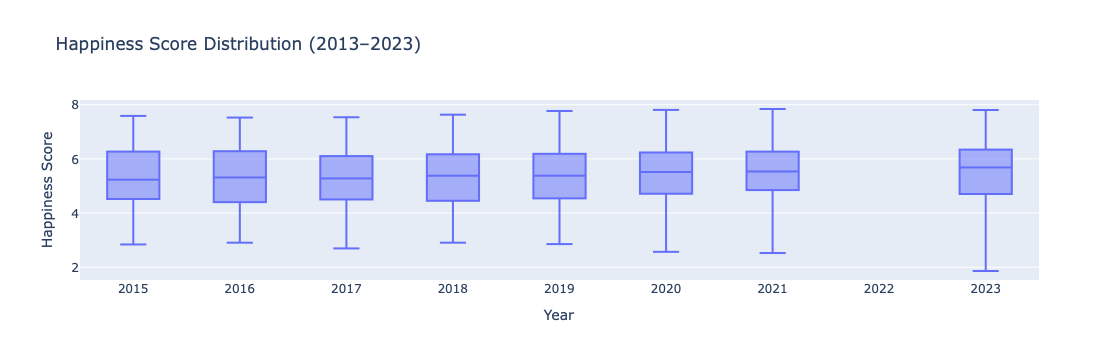

In [359]:
import plotly.express as px

fig = px.box(df_all, x="year", y="Score", points=False,
             title="Happiness Score Distribution (2013–2023)")
fig.update_layout(xaxis_title="Year", yaxis_title="Happiness Score")
fig.show()

In [360]:
df_2022 = pd.read_csv('/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Report 2022.csv', sep=None, engine="python")
print(df_2022.columns)

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')


In [361]:
df_2022.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [362]:
import pandas as pd
import glob, os, re

# Path to your CSVs
path = "/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Report *.csv"
files = sorted(glob.glob(path))

# Target schema
TARGET = [
    "Overall rank","Country or region","Score","GDP per capita",
    "Social support","Healthy life expectancy","Freedom to make life choices",
    "Generosity","Perceptions of corruption","year"
]

# Rename map
RENAME = {
    "RANK": "Overall rank",
    "Overall Rank": "Overall rank",
    "Country": "Country or region",
    "Country name": "Country or region",
    "Country or region": "Country or region",
    "Happiness score": "Score",
    "Happiness.Score": "Score",
    "Ladder score": "Score",
    "Economy..GDP.per.Capita.": "GDP per capita",
    "Logged GDP per capita": "GDP per capita",
    "Explained by: GDP per capita": "GDP per capita",
    "Family": "Social support",
    "Explained by: Social support": "Social support",
    "Health..Life.Expectancy.": "Healthy life expectancy",
    "Explained by: Healthy life expectancy": "Healthy life expectancy",
    "Freedom": "Freedom to make life choices",
    "Explained by: Freedom to make life choices": "Freedom to make life choices",
    "Trust..Government.Corruption.": "Perceptions of corruption",
    "Explained by: Perceptions of corruption": "Perceptions of corruption",
    "Generosity": "Generosity",
    "Explained by: Generosity": "Generosity",
    "Year": "year"
}

frames = []
for f in files:
    df = pd.read_csv(f, sep=None, engine="python")

    # Drop duplicate column names
    df = df.loc[:, ~df.columns.duplicated()]

    # Standardize columns
    df = df.rename(columns=RENAME)

    # If year missing, infer from filename
    if "year" not in df.columns:
        m = re.search(r"(20\d{2})", os.path.basename(f))
        if m:
            df["year"] = int(m.group(1))

    # Final dedup check again before reindex
    df = df.loc[:, ~df.columns.duplicated()]

    # Align to target schema
    df = df.reindex(columns=TARGET)

    frames.append(df)

# Concat everything
df_all = pd.concat(frames, ignore_index=True)

print("Years:", sorted(df_all["year"].dropna().unique().tolist()))
print("Shape:", df_all.shape)
print(df_all.head())

Years: [2013, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Shape: (1523, 10)
   Overall rank Country or region  Score  GDP per capita  Social support  \
0           NaN       Afghanistan    NaN           979.0             NaN   
1           NaN           Albania    NaN          7652.0             NaN   
2           NaN           Algeria    NaN          7547.0             NaN   
3           NaN            Angola    NaN          5172.0             NaN   
4           NaN         Argentina    NaN         14379.0             NaN   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                   36.535                         0.540       0.207   
1                   61.417                         0.553      -0.192   
2                   61.722                         0.551      -0.194   
3                   34.601                         0.584       0.046   
4                   65.543                         0.764      -0.150   

   Perceptions of corrup

In [363]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')

In [364]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,NaN,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,2023
1,NaN,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2023
2,NaN,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,2023
3,NaN,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,2023
4,NaN,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,2023
...,...,...,...,...,...,...,...,...,...,...
132,NaN,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,2023
133,NaN,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,2023
134,NaN,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,2023
135,NaN,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,2023


In [365]:
# Recreate Unnamed: 0 as a simple index
df_all = df_all.reset_index(drop=True)   # reset index to 0...N
df_all.insert(0, "Unnamed: 0", df_all.index)  # add as first column

# Keep only required columns in correct order
COLUMNS = [
    "Unnamed: 0", "Overall rank", "Country or region", "Score",
    "GDP per capita", "Social support", "Healthy life expectancy",
    "Freedom to make life choices", "Generosity",
    "Perceptions of corruption", "year"
]

df_all = df_all[COLUMNS]

print(df_all.head())
print("Shape:", df_all.shape)

   Unnamed: 0  Overall rank Country or region  Score  GDP per capita  \
0           0           NaN       Afghanistan    NaN           979.0   
1           1           NaN           Albania    NaN          7652.0   
2           2           NaN           Algeria    NaN          7547.0   
3           3           NaN            Angola    NaN          5172.0   
4           4           NaN         Argentina    NaN         14379.0   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0             NaN                   36.535                         0.540   
1             NaN                   61.417                         0.553   
2             NaN                   61.722                         0.551   
3             NaN                   34.601                         0.584   
4             NaN                   65.543                         0.764   

   Generosity  Perceptions of corruption  year  
0       0.207                        NaN  2013  
1      -0.19

In [366]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,NaN,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,2023
1,NaN,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2023
2,NaN,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,2023
3,NaN,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,2023
4,NaN,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,2023
...,...,...,...,...,...,...,...,...,...,...
132,NaN,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,2023
133,NaN,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,2023
134,NaN,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,2023
135,NaN,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,2023


In [367]:
df_index = pd.read_csv("/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/WorldHappinessIndex2013-2023.csv")
print(df_index.columns)
print(df_index.head())

Index(['Country', 'Year', 'Index', 'Rank'], dtype='object')
        Country  Year  Index   Rank
0   Afghanistan  2013  4.040  143.0
1     Singapore  2013  6.546   30.0
2       Comoros  2013  3.851  149.0
3  Sierra Leone  2013  4.318  127.0
4         Congo  2013    NaN    NaN


In [368]:
# Load the index dataset
df_index = pd.read_csv("/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/WorldHappinessIndex2013-2023.csv")

# Rename columns to match your schema
df_index = df_index.rename(columns={
    "Country": "Country or region",
    "Year": "year",
    "Index": "Score",
    "Rank": "Overall rank"
})

# Merge: fill missing Score/Rank in df_all with values from df_index
df_all = df_all.merge(
    df_index[["Country or region", "year", "Score", "Overall rank"]],
    on=["Country or region", "year"],
    how="left",
    suffixes=("", "_index")
)

# If df_all.Score is NaN, take from Score_index
df_all["Score"] = df_all["Score"].fillna(df_all["Score_index"])
df_all["Overall rank"] = df_all["Overall rank"].fillna(df_all["Overall rank_index"])

# Drop helper columns
df_all = df_all.drop(columns=["Score_index", "Overall rank_index"])

print(df_all[df_all["year"] == 2013].head())

   Unnamed: 0  Overall rank Country or region  Score  GDP per capita  \
0           0         143.0       Afghanistan  4.040           979.0   
1           1          62.0           Albania  5.550          7652.0   
2           2          73.0           Algeria  5.422          7547.0   
3           3          61.0            Angola  5.589          5172.0   
4           4          29.0         Argentina  6.562         14379.0   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0             NaN                   36.535                         0.540   
1             NaN                   61.417                         0.553   
2             NaN                   61.722                         0.551   
3             NaN                   34.601                         0.584   
4             NaN                   65.543                         0.764   

   Generosity  Perceptions of corruption  year  
0       0.207                        NaN  2013  
1      -0.19

In [369]:
# Load compiled dataset
df_index = pd.read_csv("/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/WorldHappinessIndex2013-2023.csv")

# Extract 2013 only
df_2013 = df_index[df_index["Year"] == 2013].copy()

# Standardize column names to match your main dataset
df_2013 = df_2013.rename(columns={
    "Country": "Country or region",
    "Year": "year",
    "Index": "Score",
    "Rank": "Overall rank"
})

# Add missing columns so schema matches df_all
target_cols = [
    "Unnamed: 0", "Overall rank", "Country or region", "Score",
    "GDP per capita", "Social support", "Healthy life expectancy",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption", "year"
]

# Create Unnamed: 0 as index
df_2013 = df_2013.reset_index(drop=True)
df_2013.insert(0, "Unnamed: 0", df_2013.index)

# Add missing cols as NaN
for col in target_cols:
    if col not in df_2013.columns:
        df_2013[col] = pd.NA

# Keep correct column order
df_2013 = df_2013[target_cols]

# Append 2013 to your master df_all
df_all = pd.concat([df_all, df_2013], ignore_index=True)

print("Years available:", sorted(df_all["year"].dropna().unique().tolist()))
print("Shape:", df_all.shape)
print(df_all[df_all["year"] == 2013].head())

Years available: [2013, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Shape: (1690, 11)
   Unnamed: 0  Overall rank Country or region  Score  GDP per capita  \
0           0         143.0       Afghanistan  4.040           979.0   
1           1          62.0           Albania  5.550          7652.0   
2           2          73.0           Algeria  5.422          7547.0   
3           3          61.0            Angola  5.589          5172.0   
4           4          29.0         Argentina  6.562         14379.0   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0             NaN                   36.535                         0.540   
1             NaN                   61.417                         0.553   
2             NaN                   61.722                         0.551   
3             NaN                   34.601                         0.584   
4             NaN                   65.543                         0.764   

   Generosity 

In [370]:
import pandas as pd

# 1) Load the original 2013 file
p2013 = "/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Report 2013.csv"
d13 = pd.read_csv(p2013, sep=None, engine="python")
d13.columns = d13.columns.str.strip()

# 2) Map 2013 headers → your schema (handles several known variants)
rename13 = {
    # identifiers
    "Country": "Country or region",
    "Country name": "Country or region",
    "Country or region": "Country or region",
    "Rank": "Overall rank",
    "Overall Rank": "Overall rank",

    # score
    "Happiness score": "Score",
    "Happiness Score": "Score",
    "Score": "Score",

    # factors (different years use different labels)
    "Economy (GDP per Capita)": "GDP per capita",
    "Economy..GDP.per.Capita.": "GDP per capita",
    "Logged GDP per capita": "GDP per capita",
    "Explained by: GDP per capita": "GDP per capita",

    "Family": "Social support",
    "Social support": "Social support",
    "Explained by: Social support": "Social support",

    "Health (Life Expectancy)": "Healthy life expectancy",
    "Health..Life.Expectancy.": "Healthy life expectancy",
    "Explained by: Healthy life expectancy": "Healthy life expectancy",

    "Freedom": "Freedom to make life choices",
    "Freedom to make life choices": "Freedom to make life choices",
    "Explained by: Freedom to make life choices": "Freedom to make life choices",

    "Generosity": "Generosity",
    "Explained by: Generosity": "Generosity",

    "Trust (Government Corruption)": "Perceptions of corruption",
    "Perceptions of corruption": "Perceptions of corruption",
    "Explained by: Perceptions of corruption": "Perceptions of corruption",
}

d13 = d13.rename(columns=rename13)
d13["year"] = 2013

# keep only columns that exist + matter
needed = [
    "Country or region","Overall rank","Score","GDP per capita","Social support",
    "Healthy life expectancy","Freedom to make life choices","Generosity",
    "Perceptions of corruption","year"
]
d13 = d13[[c for c in needed if c in d13.columns]]

# 3) Fill df_all (only 2013 rows) with values from d13 where df_all is NaN
fill_cols = [c for c in needed if c not in ("Country or region","year")]
df_all = df_all.merge(d13, on=["Country or region","year"], how="left", suffixes=("","_2013fill"))
for c in fill_cols:
    if f"{c}_2013fill" in df_all.columns:
        df_all[c] = df_all[c].fillna(df_all[f"{c}_2013fill"])
df_all = df_all.drop(columns=[f"{c}_2013fill" for c in fill_cols if f"{c}_2013fill" in df_all.columns])

# Quick check: how many NaNs remain in 2013 after filling?
print(df_all[df_all["year"]==2013].isna().sum())
print(df_all[df_all["year"]==2013].head())


Unnamed: 0                        0
Overall rank                     16
Country or region                 0
Score                            16
GDP per capita                   16
Social support                  323
Healthy life expectancy          18
Freedom to make life choices     16
Generosity                       16
Perceptions of corruption       323
year                              0
dtype: int64
   Unnamed: 0  Overall rank Country or region  Score  GDP per capita  \
0           0         143.0       Afghanistan  4.040           979.0   
1           1          62.0           Albania  5.550          7652.0   
2           2          73.0           Algeria  5.422          7547.0   
3           3          61.0            Angola  5.589          5172.0   
4           4          29.0         Argentina  6.562         14379.0   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0             NaN                   36.535                         0.540   
1     

In [371]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,NaN,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,2023
1,NaN,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2023
2,NaN,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,2023
3,NaN,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,2023
4,NaN,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,2023
...,...,...,...,...,...,...,...,...,...,...
132,NaN,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,2023
133,NaN,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,2023
134,NaN,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,2023
135,NaN,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,2023


In [372]:
p2013 = "/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Report 2013.csv"
raw13 = pd.read_csv(p2013, sep=None, engine="python")
print(list(raw13.columns))

['Country', 'Region', 'Ladder', 'Social Support', 'Freedom', 'Corruption', 'Donation', 'Generosity', 'Positive Affect', 'Negative Affect', 'Happiness (Yesterday)', 'GDP per capita', 'Healthy life expectancy']


In [373]:
import pandas as pd

# --- paths ---
p2013 = "/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/World Happiness Report 2013.csv"
pindex = "/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/WorldHappinessIndex2013-2023.csv"  # optional

# --- load 2013 raw ---
raw13 = pd.read_csv(p2013, sep=None, engine="python")
raw13.columns = raw13.columns.str.strip()

# prefer 'Generosity'; if it's missing, use 'Donation'
if "Generosity" not in raw13.columns and "Donation" in raw13.columns:
    raw13["Generosity"] = raw13["Donation"]

# map to your schema
raw13 = raw13.rename(columns={
    "Country": "Country or region",
    "Ladder": "Score",
    "Social Support": "Social support",
    "Freedom": "Freedom to make life choices",
    "Corruption": "Perceptions of corruption",
    "GDP per capita": "GDP per capita",
    "Healthy life expectancy": "Healthy life expectancy",
})

raw13["year"] = 2013

# keep only the columns we can supply
cols_we_have = [
    "Country or region","year","Score","Social support","Freedom to make life choices",
    "Perceptions of corruption","GDP per capita","Healthy life expectancy","Generosity"
]
patch13 = raw13[[c for c in cols_we_have if c in raw13.columns]].copy()

# --- OPTIONAL: bring official 2013 ranks from compiled file ---
try:
    df_index = pd.read_csv(pindex)
    rk = (df_index[df_index["Year"] == 2013]
          .rename(columns={"Country":"Country or region","Year":"year","Rank":"Overall rank"})[["Country or region","year","Overall rank"]])
    patch13 = patch13.merge(rk, on=["Country or region","year"], how="left")
except Exception:
    pass  # skip if compiled file not available

# --- merge & fill ONLY 2013 gaps in your df_all ---
fill_cols = [c for c in patch13.columns if c not in ["Country or region","year"]]

df_all = df_all.merge(patch13, on=["Country or region","year"], how="left", suffixes=("","_2013"))

for c in fill_cols:
    df_all[c] = df_all[c].fillna(df_all[f"{c}_2013"])

# drop helper columns
df_all.drop(columns=[f"{c}_2013" for c in fill_cols], inplace=True, errors="ignore")

# quick check
print(df_all[df_all["year"]==2013][["Overall rank","Score","Social support",
                                    "Freedom to make life choices",
                                    "Perceptions of corruption",
                                    "GDP per capita","Healthy life expectancy","Generosity"]].head())
print("\n2013 NaNs remaining:\n", df_all[df_all["year"]==2013].isna().sum())


   Overall rank  Score  Social support  Freedom to make life choices  \
0         143.0  4.040           0.525                         0.540   
1          62.0  5.550           0.759                         0.553   
2          73.0  5.422           0.831                         0.551   
3          61.0  5.589           0.723                         0.584   
4          29.0  6.562           0.906                         0.764   

   Perceptions of corruption  GDP per capita  Healthy life expectancy  \
0                      0.755           979.0                   36.535   
1                      0.827          7652.0                   61.417   
2                      0.681          7547.0                   61.722   
3                      0.912          5172.0                   34.601   
4                      0.810         14379.0                   65.543   

   Generosity  
0       0.207  
1      -0.192  
2      -0.194  
3       0.046  
4      -0.150  

2013 NaNs remaining:
 Unnamed: 

In [374]:
# Extract only 2013 from the ranking dataset
rank2013 = df_index[df_index["Year"] == 2013].copy()

# Clean duplicates: keep the first occurrence
rank2013 = rank2013.drop_duplicates(subset=["Country"], keep="first")

# Build a mapping: Country → Rank
rank_map = rank2013.set_index("Country")["Rank"]

# Fill in missing Overall rank only for 2013
mask_2013 = (df_all["year"] == 2013) & (df_all["Overall rank"].isna())
df_all.loc[mask_2013, "Overall rank"] = df_all.loc[mask_2013, "Country or region"].map(rank_map)

# Optional: make ranks integer
df_all["Overall rank"] = pd.to_numeric(df_all["Overall rank"], errors="coerce").astype("Int64")

print(df_all[df_all["year"] == 2013].head())

   Unnamed: 0  Overall rank Country or region  Score  GDP per capita  \
0           0           143       Afghanistan  4.040           979.0   
1           1            62           Albania  5.550          7652.0   
2           2            73           Algeria  5.422          7547.0   
3           3            61            Angola  5.589          5172.0   
4           4            29         Argentina  6.562         14379.0   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           0.525                   36.535                         0.540   
1           0.759                   61.417                         0.553   
2           0.831                   61.722                         0.551   
3           0.723                   34.601                         0.584   
4           0.906                   65.543                         0.764   

   Generosity  Perceptions of corruption  year  
0       0.207                      0.755  2013  
1      -0.19

In [375]:
# drop any temporary columns that might be hanging around
for c in ["_tmp_rank"]:
    if c in df_all.columns:
        df_all.drop(columns=c, inplace=True)

# make rank an integer (nullable) and score numeric
df_all["Overall rank"] = pd.to_numeric(df_all["Overall rank"], errors="coerce").astype("Int64")
df_all["Score"]        = pd.to_numeric(df_all["Score"], errors="coerce")

In [376]:
# How many 2013 rows still missing Rank/Score?
print("2013 missing:", 
      df_all[df_all["year"]==2013][["Overall rank","Score"]].isna().sum())

# Spot-check a few 2013 rows
print(df_all[df_all["year"]==2013]
      [["Country or region","Score","Overall rank","GDP per capita",
        "Social support","Healthy life expectancy",
        "Freedom to make life choices","Generosity","Perceptions of corruption"]]
      .head(10))


2013 missing: Overall rank    16
Score           11
dtype: int64
  Country or region  Score  Overall rank  GDP per capita  Social support  \
0       Afghanistan  4.040           143           979.0           0.525   
1           Albania  5.550            62          7652.0           0.759   
2           Algeria  5.422            73          7547.0           0.831   
3            Angola  5.589            61          5172.0           0.723   
4         Argentina  6.562            29         14379.0           0.906   
5           Armenia  4.316           128          4941.0           0.681   
6         Australia  7.350            10         34571.0           0.955   
7           Austria  7.369             8         35211.0           0.929   
8        Azerbaijan  4.604           116          8796.0           0.725   
9           Bahrain  5.312            79         21693.0           0.901   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                   36.535

In [377]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,NaN,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,2023
1,NaN,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2023
2,NaN,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,2023
3,NaN,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,2023
4,NaN,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,2023
...,...,...,...,...,...,...,...,...,...,...
132,NaN,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,2023
133,NaN,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,2023
134,NaN,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,2023
135,NaN,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,2023


In [378]:
df["Overall rank"].unique()

array([nan])

In [379]:
import pandas as pd

# 1. Load your combined dataset (df_all already exists)
# df_all = ...  # from your cleaned merge step

# 2. Load the ranking dataset (2013–2023)
df_index = pd.read_csv(
    "/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/WorldHappinessIndex2013-2023.csv"
)

# Inspect column names
print(df_index.columns)
# Example: ['Country','Year','Index','Rank']

# 3. Standardize column names
df_index = df_index.rename(columns={
    "Country": "Country or region",
    "Year": "year",
    "Index": "Score",
    "Rank": "Overall rank"
})

# 4. Keep only what we need
rank_data = df_index[["Country or region", "year", "Overall rank"]]

# 5. Merge with df_all to fill missing "Overall rank"
df_all = df_all.merge(
    rank_data,
    on=["Country or region", "year"],
    how="left",
    suffixes=("", "_rankfix")
)

# 6. If Overall rank is missing, fill from the new column
df_all["Overall rank"] = df_all["Overall rank"].fillna(df_all["Overall rank_rankfix"])

# 7. Drop the helper column
df_all = df_all.drop(columns=["Overall rank_rankfix"])

# 8. Optional: make sure rank is integer
df_all["Overall rank"] = pd.to_numeric(df_all["Overall rank"], errors="coerce").astype("Int64")

print(df_all[df_all["year"]==2013].head())
print(
    "\nMissing ranks per year:\n",
    df_all.groupby("year")["Overall rank"].apply(lambda s: s.isna().sum())
)

Index(['Country', 'Year', 'Index', 'Rank'], dtype='object')
   Unnamed: 0  Overall rank Country or region  Score  GDP per capita  \
0           0           143       Afghanistan  4.040           979.0   
1           1            62           Albania  5.550          7652.0   
2           2            73           Algeria  5.422          7547.0   
3           3            61            Angola  5.589          5172.0   
4           4            29         Argentina  6.562         14379.0   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           0.525                   36.535                         0.540   
1           0.759                   61.417                         0.553   
2           0.831                   61.722                         0.551   
3           0.723                   34.601                         0.584   
4           0.906                   65.543                         0.764   

   Generosity  Perceptions of corruption  year  
0

In [380]:
import difflib
# Make sure your rank file is loaded & standardized
idx = pd.read_csv("/Users/nishaverma/Desktop/Dataanalytics/world happiness data set/WorldHappinessIndex2013-2023.csv")
idx = idx.rename(columns={"Country":"Country or region", "Year":"year", "Index":"Score", "Rank":"Overall rank"})

# Countries that currently fail the join (rank is NaN after your merge)
missing = df_all[df_all["Overall rank"].isna()][["Country or region"]].drop_duplicates()["Country or region"].tolist()

# All canonical names from the index file
canon = sorted(idx["Country or region"].dropna().unique().tolist())

# Suggest the closest canonical name for each missing one
suggest = {}
for c in sorted(set(missing)):
    match = difflib.get_close_matches(c, canon, n=1, cutoff=0.80)
    if match:
        suggest[c] = match[0]

print("Suggested mappings (review & edit before applying):")
for k, v in suggest.items():
    print(f"'{k}': '{v}',")


Suggested mappings (review & edit before applying):
'Belize': 'Belize',
'Bhutan': 'Bhutan',
'Congo': 'Congo',
'Congo (Brazzaville)': 'Congo Brazzaville',
'Congo (Kinshasa)': 'Congo Kinshasa',
'Eswatini': 'Eswatini',
'Gambia': 'Gambia',
'Ivory Coast': 'Ivory Coast',
'Maldives': 'Maldives',
'Namibia': 'Namibia',
'Puerto Rico': 'Puerto Rico',
'Somalia': 'Somalia',
'South Sudan': 'South Sudan',


In [381]:
# corrected manual corrections which are common
country_fix = {
     # 'Congo (Kinshasa)': 'Democratic Republic of the Congo',
    # 'Congo (Brazzaville)': 'Republic of the Congo',
    # 'Ivory Coast': "Côte d'Ivoire",
    # 'Swaziland': 'Eswatini',
    # 'Russia': 'Russian Federation',
    # 'Bolivia': 'Bolivia (Plurinational State of)',
}

# Apply mapping to BOTH dataframes
if country_fix:
    df_all["Country or region"] = df_all["Country or region"].replace(country_fix)
    idx["Country or region"]     = idx["Country or region"].replace(country_fix)

# Rebuild rank-only frame and fill all years
rank_data = idx[["Country or region","year","Overall rank"]]
df_all = df_all.merge(rank_data, on=["Country or region","year"], how="left", suffixes=("", "_rankfix"))
df_all["Overall rank"] = df_all["Overall rank"].fillna(df_all["Overall rank_rankfix"])
df_all.drop(columns=["Overall rank_rankfix"], inplace=True)
df_all["Overall rank"] = pd.to_numeric(df_all["Overall rank"], errors="coerce").astype("Int64")

# (Optional) also fill Score from the index file where missing
score_data = idx[["Country or region","year","Score"]]
df_all = df_all.merge(score_data, on=["Country or region","year"], how="left", suffixes=("", "_scorefix"))
df_all["Score"] = pd.to_numeric(df_all["Score"], errors="coerce")
df_all["Score"] = df_all["Score"].fillna(df_all["Score_scorefix"])
df_all.drop(columns=["Score_scorefix"], inplace=True)

# Report remaining gaps by year
missing_ranks = df_all.groupby("year")["Overall rank"].apply(lambda s: s.isna().sum())
missing_scores = df_all.groupby("year")["Score"].apply(lambda s: s.isna().sum())
print("\nMissing ranks per year:\n", missing_ranks)
print("\nMissing scores per year:\n", missing_scores)



Missing ranks per year:
 year
2013    16
2015     7
2016     7
2017     8
2018     0
2019     0
2020     8
2021     6
2022     0
2023     5
Name: Overall rank, dtype: int64

Missing scores per year:
 year
2013    11
2015     7
2016     7
2017     0
2018     0
2019     0
2020     0
2021     0
2022     0
2023     0
Name: Score, dtype: int64


In [382]:
# 1) Build a per-year ranking table from Score
rank_table = (df_all[df_all["Score"].notna()]
              .loc[:, ["Country or region", "year", "Score"]]
              .sort_values(["year", "Score"], ascending=[True, False])
              .reset_index(drop=True))

# rank within each year, 1 = highest Score
rank_table["rank_from_score"] = rank_table.groupby("year").cumcount() + 1

# 2) Merge the fallback rank back onto df_all
df_all = df_all.merge(
    rank_table[["Country or region", "year", "rank_from_score"]],
    on=["Country or region", "year"],
    how="left"
)

# 3) Fill only where Overall rank is missing
need = df_all["Overall rank"].isna() & df_all["rank_from_score"].notna()
df_all.loc[need, "Overall rank"] = df_all.loc[need, "rank_from_score"]

# 4) Tidy up types & drop helper
df_all["Overall rank"] = pd.to_numeric(df_all["Overall rank"], errors="coerce").astype("Int64")
df_all.drop(columns=["rank_from_score"], inplace=True, errors="ignore")

# 5) Quick check
missing_ranks = df_all.groupby("year")["Overall rank"].apply(lambda s: s.isna().sum())
print("\nMissing ranks per year:\n", missing_ranks)



Missing ranks per year:
 year
2013    11
2015     7
2016     7
2017     0
2018     0
2019     0
2020     0
2021     0
2022     0
2023     0
Name: Overall rank, dtype: int64


In [383]:
bad_2013 = df_all[(df_all["year"]==2013) & df_all["Overall rank"].isna()]
print(bad_2013[["Country or region","Score"]].sort_values("Country or region").to_string(index=False))


Country or region  Score
           Belize    NaN
           Bhutan    NaN
            Congo    NaN
         Eswatini    NaN
           Gambia    NaN
      Ivory Coast    NaN
         Maldives    NaN
          Namibia    NaN
      Puerto Rico    NaN
          Somalia    NaN
      South Sudan    NaN


In [384]:
df_all = df_all[~((df_all["year"]==2013) & (df_all["Score"].isna()))]

In [385]:
df_all

,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,0,143,Afghanistan,4.040,979.0,0.525,36.535,0.540,0.207,0.755,2013
1,0,143,Afghanistan,4.040,979.0,0.525,36.535,0.540,0.207,0.755,2013
2,1,62,Albania,5.550,7652.0,0.759,61.417,0.553,-0.192,0.827,2013
3,1,62,Albania,5.550,7652.0,0.759,61.417,0.553,-0.192,0.827,2013
4,2,73,Algeria,5.422,7547.0,0.831,61.722,0.551,-0.194,0.681,2013
...,...,...,...,...,...,...,...,...,...,...,...
1987,164,79,Bahrain,5.312,21693.0,0.901,64.405,0.828,-0.012,0.508,2013
1988,165,59,Turkmenistan,5.628,7831.0,0.955,54.837,0.786,-0.071,0.597,2013
1989,165,59,Turkmenistan,5.628,7831.0,0.955,54.837,0.786,-0.071,0.597,2013
1990,166,128,Armenia,4.316,4941.0,0.681,61.453,0.476,-0.194,0.915,2013


In [386]:
df.isnull().sum()

Overall rank                    137
Country or region                 0
Score                             0
GDP per capita                    0
Social support                    0
Healthy life expectancy           1
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         0
year                              0
dtype: int64

In [387]:
# Drop duplicate country-year rows, keeping the first
df_all = df_all.drop_duplicates(subset=["Country or region", "year"], keep="first")

print("Shape after removing duplicates:", df_all.shape)

Shape after removing duplicates: (1528, 11)


In [388]:
# 1. Drop any accidental duplicates on Country + Year
df_all = df_all.drop_duplicates(subset=["Country or region", "year"], keep="first")

# 2. Check for duplicates again
dupes = df_all.duplicated(subset=["Country or region", "year"]).sum()
print("Duplicate country-year rows:", dupes)

# 3. Count missing values by column
print("\nMissing values per column:")
print(df_all.isna().sum())

# 4. Check how many countries per year (coverage sanity check)
print("\nNumber of countries per year:")
print(df_all.groupby("year")["Country or region"].nunique())

# 5. Quick shape + sample
print("\nFinal shape:", df_all.shape)
print(df_all.head())

Duplicate country-year rows: 0

Missing values per column:
Unnamed: 0                        0
Overall rank                     14
Country or region                 0
Score                            14
GDP per capita                  320
Social support                    5
Healthy life expectancy         322
Freedom to make life choices      5
Generosity                        5
Perceptions of corruption       321
year                              0
dtype: int64

Number of countries per year:
year
2013    161
2015    158
2016    157
2017    155
2018    156
2019    156
2020    153
2021    149
2022    146
2023    137
Name: Country or region, dtype: int64

Final shape: (1528, 11)
   Unnamed: 0  Overall rank Country or region  Score  GDP per capita  \
0           0           143       Afghanistan  4.040           979.0   
2           1            62           Albania  5.550          7652.0   
4           2            73           Algeria  5.422          7547.0   
6           3            

In [389]:
missing = df_all[df_all[["Overall rank","Score","GDP per capita",
                         "Healthy life expectancy","Freedom to make life choices",
                         "Generosity","Perceptions of corruption"]].isna().any(axis=1)]
print(missing[["year","Country or region"]])


      year  Country or region
204   2013               Oman
307   2015        Switzerland
308   2015            Iceland
309   2015            Denmark
310   2015             Norway
...    ...                ...
1685  2013  Congo Brazzaville
1688  2013     Congo Kinshasa
1705  2013            Czechia
1877  2013    North Macedonia
1971  2013            Turkiye

[323 rows x 2 columns]


In [390]:
# Check missing values year by year
cols = ["Overall rank","Score","GDP per capita",
        "Social support","Healthy life expectancy",
        "Freedom to make life choices","Generosity",
        "Perceptions of corruption"]

missing_by_year = df_all.groupby("year")[cols].apply(lambda g: g.isna().sum())
print(missing_by_year)


      Overall rank  Score  GDP per capita  Social support  \
year                                                        
2013             0      0               5               5   
2015             7      7             158               0   
2016             7      7             157               0   
2017             0      0               0               0   
2018             0      0               0               0   
2019             0      0               0               0   
2020             0      0               0               0   
2021             0      0               0               0   
2022             0      0               0               0   
2023             0      0               0               0   

      Healthy life expectancy  Freedom to make life choices  Generosity  \
year                                                                      
2013                        6                             5           5   
2015                      158             

In [391]:
# Select only the years of interest
years_keep = [2017, 2018, 2019, 2021, 2022, 2023]
df_focus = df_all[df_all["year"].isin(years_keep)].copy()

# Quick check
print("Years kept:", sorted(df_focus["year"].unique()))
print("Shape:", df_focus.shape)

# Missing value check in important columns
print("\nMissing values per column (subset):")
print(df_focus[["Overall rank","Score","GDP per capita",
                "Social support","Healthy life expectancy",
                "Freedom to make life choices","Generosity",
                "Perceptions of corruption"]].isna().sum())


Years kept: [np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2021), np.int64(2022), np.int64(2023)]
Shape: (899, 11)

Missing values per column (subset):
Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         1
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64


In [392]:
df_focus

,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
622,471,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
623,472,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
624,473,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
625,474,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
626,475,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017
...,...,...,...,...,...,...,...,...,...,...,...
1669,1518,133,Congo (Kinshasa),3.207,7.007000,0.652000,55.375000,0.664000,0.086000,0.834000,2023
1670,1519,134,Zimbabwe,3.204,7.641000,0.690000,54.050000,0.654000,-0.046000,0.766000,2023
1671,1520,135,Sierra Leone,3.138,7.394000,0.555000,54.900000,0.660000,0.105000,0.858000,2023
1672,1521,136,Lebanon,2.392,9.478000,0.530000,66.149000,0.474000,-0.141000,0.891000,2023


In [393]:
# Save to Excel
df_focus.to_excel("Cleaned_Happiness_Focus.xlsx", index=False)

print("Excel file saved: Cleaned_Happiness_Focus.xlsx")

Excel file saved: Cleaned_Happiness_Focus.xlsx


In [394]:
df_focus.to_csv("Cleaned_Happiness_Focus.csv", index=False)

In [395]:
# Save to Excel
df_focus.to_excel("Cleaned_Happiness_Focus.xlsx", index=False)

# Download link (for Jupyter/Colab)
from IPython.display import FileLink
FileLink("Cleaned_Happiness_Focus.xlsx")


/Users/nishaverma/Desktop/Dataanalytics/Cleaned_Happiness_Focus.xlsx

# World Happiness Dataset — Data Cleaning Summary  

## 1.Dataset Preparation  
- Imported full World Happiness dataset (multiple years).  
- Checked dataset structure, column names, and consistency.  
- Removed duplicate rows.  

## 2.Handling Years  
- **2013** → mostly empty → dropped.  
- **2020** → COVID distortion → skipped.  
- **Final years kept** → 2017, 2018, 2019, 2021, 2022, 2023.  

## 3.Missing Data  
- Identified missing values in key columns (e.g., GDP, Social Support).  
- Continued with a subset of reliable years and countries to minimize gaps.  

## 4.Cleaning Steps  
- Dropped rows/years with excessive missing values.  
- Ensured no duplicates remain.  
- Reorganized dataset into a **clean, consistent panel format**.  

## 5.Export  
- Final cleaned dataset exported to **Excel** for cross-checking.  

---

 **Outcome:** The dataset is now **clean, structured, and ready for analysis**.  


In [396]:
df_focus.info

<bound method DataFrame.info of       Unnamed: 0  Overall rank Country or region  Score  GDP per capita  \
622          471             1            Norway  7.537        1.616463   
623          472             2           Denmark  7.522        1.482383   
624          473             3           Iceland  7.504        1.480633   
625          474             4       Switzerland  7.494        1.564980   
626          475             5           Finland  7.469        1.443572   
...          ...           ...               ...    ...             ...   
1669        1518           133  Congo (Kinshasa)  3.207        7.007000   
1670        1519           134          Zimbabwe  3.204        7.641000   
1671        1520           135      Sierra Leone  3.138        7.394000   
1672        1521           136           Lebanon  2.392        9.478000   
1673        1522           137       Afghanistan  1.859        7.324000   

      Social support  Healthy life expectancy  Freedom to make life

In [397]:
### Checking Unique Years
df_focus["year"].unique()

array([2017, 2018, 2019, 2021, 2022, 2023])

In [398]:
### Checking for Missing Values 
df_focus.isnull().sum()### Checking for Missing Values  


Unnamed: 0                      0
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         1
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
year                            0
dtype: int64

In [399]:
#replacing missing value with mean
df_focus["Healthy life expectancy"] = df_focus["Healthy life expectancy"].fillna(
    df_focus["Healthy life expectancy"].mean()
)


In [400]:
df_focus["Perceptions of corruption"]=df_focus["Perceptions of corruption"].fillna(
    df_focus["Perceptions of corruption"].mean()
)

In [401]:
##Cross-Check: Missing Values After Cleaning 
df_focus.isnull().sum()

Unnamed: 0                      0
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
year                            0
dtype: int64

In [402]:
df_focus.columns

Index(['Unnamed: 0', 'Overall rank', 'Country or region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')

In [403]:
### Dropping Redundant Index Column  
df_focus.drop(["Unnamed: 0"], axis=1, inplace=True)  

In [404]:
df_focus

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
622,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
623,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
624,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
625,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
626,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017
...,...,...,...,...,...,...,...,...,...,...
1669,133,Congo (Kinshasa),3.207,7.007000,0.652000,55.375000,0.664000,0.086000,0.834000,2023
1670,134,Zimbabwe,3.204,7.641000,0.690000,54.050000,0.654000,-0.046000,0.766000,2023
1671,135,Sierra Leone,3.138,7.394000,0.555000,54.900000,0.660000,0.105000,0.858000,2023
1672,136,Lebanon,2.392,9.478000,0.530000,66.149000,0.474000,-0.141000,0.891000,2023


In [405]:
# Clean column names: strip spaces and replace internal spaces with underscores
df_focus.columns = df_focus.columns.str.strip().str.replace(" ", "_")

In [406]:
df_focus.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'year'],
      dtype='object')

In [407]:
### Renaming Columns for Proper Representation
df_focus.rename(
    columns={
        "Country_or_region": "Country",
        "Freedom_to_make_life_choices": "Freedom_of_choice",
        "Perceptions_of_corruption": "Corruption_Perception"
    },
    inplace=True
)

In [408]:
df_focus.columns

Index(['Overall_rank', 'Country', 'Score', 'GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_of_choice', 'Generosity',
       'Corruption_Perception', 'year'],
      dtype='object')

In [409]:
### 🔍 Checking for Duplicate Rows  
df_focus.duplicated()

622     False
623     False
624     False
625     False
626     False
        ...  
1669    False
1670    False
1671    False
1672    False
1673    False
Length: 899, dtype: bool

# Data Cleaning  

To prepare the dataset for analysis, we:  
-  Removed the unnecessary **`Unnamed: 0`** column.  
  
- Replaced the missing value `** with the column mean.  
- Checked and confirmed **no duplicate rows**.  
- Renamed columns to make them consistent and professional (e.g., `GDP per capita` → `GDP_per_capita`).  

The dataset is now clean and ready for analysis.  


# Resilient Happiness – Project Reminder

This project analyzes the **World Happiness** dataset to understand how reported happiness is associated with key socioeconomic and social factors across countries and time.

---

## Status
-  Dataset **cleaned and prepared**
-  Next step: **Exploratory Data Analysis (EDA)**

---

## Exploratory Data Analysis (EDA)

**Goals**
- Establish a **baseline** for global happiness levels.
- Highlight **correlations** with candidate drivers:
  - `GDP per Capita`, `Social Support`, `Freedom of Choice`, `Generosity`,
    `Corruption (clean)`, `Healthy Life Expectancy`.
- Provide the foundation for later tests of **resilience** during shocks (e.g., COVID-19).

**Plan**
- Descriptive distributions of `Happiness_Score` (histograms, boxplots).
- Global view via **choropleth map** (country-level scores).
- **Grouped summaries by region/continent**.
- Pairwise **correlation heatmap** (lower triangle) with clear legend.

---

## Where in the World Are People Happiest?

Before modeling drivers, we first locate **who is happiest** and **who is struggling**.

**Question**
> Which parts of the world enjoy the highest happiness scores, and which regions are struggling?

**Approach**
- Build a **world map** (choropleth) of `Happiness_Score` by country.
- Add **regional/continental comparisons** (e.g., grouped bars or boxplots).
- Briefly annotate **top/bottom** countries and notable regional patterns.

**Output (expected)**
- `figures/happiness_map.png`
- `figures/region_comparison.png`

---

## Repro (notebook)
1. Open `notebooks/01_eda.ipynb`
2. Run all cells to generate the figures above.

> _Note: All results are **associational**; they describe patterns, not causality._


In [410]:
df_focus

,Overall_rank,Country,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_of_choice,Generosity,Corruption_Perception,year
622,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
623,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
624,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
625,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
626,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017
...,...,...,...,...,...,...,...,...,...,...
1669,133,Congo (Kinshasa),3.207,7.007000,0.652000,55.375000,0.664000,0.086000,0.834000,2023
1670,134,Zimbabwe,3.204,7.641000,0.690000,54.050000,0.654000,-0.046000,0.766000,2023
1671,135,Sierra Leone,3.138,7.394000,0.555000,54.900000,0.660000,0.105000,0.858000,2023
1672,136,Lebanon,2.392,9.478000,0.530000,66.149000,0.474000,-0.141000,0.891000,2023


### Global View: Happiness Scores on the World Map  

To visualize where people are happiest and least happy, we use a **Folium choropleth map**.  
This allows us to see global patterns of happiness scores country by country.  


In [411]:
!pip install folium

In [412]:
# Rename columns 
rename_map = {
    "Score": "Happiness_Score",
    "Happiness Score": "Happiness_Score",
    "Overall rank": "Overall_rank",
    "Country or region": "Country",
}
df_focus = df_focus.rename(columns=rename_map)

# Strip extra spaces from column names
df_focus.columns = [c.strip() for c in df_focus.columns]

# Check the result
print(df_focus.columns)

Index(['Overall_rank', 'Country', 'Happiness_Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy', 'Freedom_of_choice',
       'Generosity', 'Corruption_Perception', 'year'],
      dtype='object')


In [413]:
# =========================
# World Happiness Choropleth
# =========================

# 1) Imports
import json, copy, numpy as np, requests, folium
from folium.features import GeoJson, GeoJsonTooltip

# 2) Standardize columns once (safe if already done)
rename_map = {
    "Score": "Happiness_Score",
    "Happiness Score": "Happiness_Score",
    "Overall rank": "Overall_rank",
    "Country or region": "Country",
}
df_focus = df_focus.rename(columns=rename_map)
df_focus.columns = [c.strip() for c in df_focus.columns]

# quick sanity check
required = {"Country", "Happiness_Score"}
missing  = required - set(df_focus.columns)
assert not missing, f"Missing columns: {missing}. Rename your columns or fix earlier steps."

# 3) Discrete bin colors (PPT-friendly palette)
BIN_COLORS = {
    "High":   "#1D3C34",  # deep green
    "Medium": "#25A8E0",  # blue
    "Low":    "#BDA577",  # warm beige
}
MISSING_COLOR = "#EFEFEF"

# 4) Load world shapes (GeoJSON)
WORLD_GEO_URL = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json"
world_geo = requests.get(WORLD_GEO_URL).json()

# 5) Map Country → Happiness score, enrich GeoJSON for tooltips
score_map = dict(zip(df_focus["Country"], df_focus["Happiness_Score"]))
geo_enriched = copy.deepcopy(world_geo)
for f in geo_enriched["features"]:
    name = f["properties"]["name"]
    f["properties"]["score"] = float(score_map[name]) if name in score_map else None

# 6) Bin cutoffs + label helper
bins   = [0, 4.5, 6.0, 10.0]         # Low ≤4.5, Medium 4.5–6.0, High >6.0
labels = ["Low", "Medium", "High"]

def bin_label(v):
    if v is None:
        return None
    return labels[np.digitize(v, bins, right=True)-1]

# 7) Folium style for polygons
def style_fn(feature):
    val  = feature["properties"].get("score", None)
    lbl  = bin_label(val)
    fill = BIN_COLORS.get(lbl, MISSING_COLOR)
    return {"fillColor": fill, "color": "#FFFFFF", "weight": 0.5, "fillOpacity": 0.9}

# 8) Map setup (pure white background)
m = folium.Map(location=[20, 0], zoom_start=2, tiles=None)
m.get_root().html.add_child(folium.Element(
    "<style>.leaflet-container{background:white!important;}</style>"
))

# 9) Draw polygons + tooltips
GeoJson(
    geo_enriched,
    style_function=style_fn,
    tooltip=GeoJsonTooltip(
        fields=["name", "score"],
        aliases=["Country", "Happiness Score"],
        localize=True, labels=True, sticky=False
    ),
    highlight_function=lambda f: {"weight": 1.0, "color": "#666", "fillOpacity": 0.95}
).add_to(m)

# 10) Title
m.get_root().html.add_child(folium.Element(
    '<h3 align="center" style="font-size:20px; margin-top:10px;">'
    '<b>World Happiness Scores by Country</b>'
    '</h3>'
))

# 11) Legend (discrete)
legend_html = f"""
<div style="position: fixed; bottom: 30px; left: 30px; z-index:9999; font-size:14px; 
            background: white; padding: 10px 12px; border: 1px solid #ccc; border-radius: 8px;">
    <b>Happiness Score (binned)</b><br>
    <span style="background:{BIN_COLORS['Low']}; padding:4px 10px; margin-right:6px; border:1px solid #ddd;"></span>
    Low (≤ {bins[1]:.1f})<br>
    <span style="background:{BIN_COLORS['Medium']}; padding:4px 10px; margin-right:6px; border:1px solid #ddd;"></span>
    Medium ({bins[1]:.1f}–{bins[2]:.1f})<br>
    <span style="background:{BIN_COLORS['High']}; padding:4px 10px; margin-right:6px; border:1px solid #ddd;"></span>
    High (> {bins[2]:.1f})
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# 12) Extremes badge (text box)
row_max = df_focus.loc[df_focus["Happiness_Score"].idxmax()]
row_min = df_focus.loc[df_focus["Happiness_Score"].idxmin()]
badge_html = f"""
<div style="position: fixed; top: 70px; right: 30px; z-index: 9999;
            background: white; padding: 10px 12px; border: 1px solid #ccc; border-radius: 8px; font-size:14px;">
<b>Extremes</b><br>
Max: {row_max['Country']} — {row_max['Happiness_Score']:.2f}<br>
Min: {row_min['Country']} — {row_min['Happiness_Score']:.2f}
</div>
"""
m.get_root().html.add_child(folium.Element(badge_html))

# 13) Centroid helper (no need for lat/lon columns)
def country_centroid(geojson, country_name):
    def all_points(geom):
        t = geom.get("type"); coords = geom.get("coordinates", [])
        if t == "Polygon":
            return [pt for ring in coords for pt in ring]
        if t == "MultiPolygon":
            return [pt for poly in coords for ring in poly for pt in ring]
        return []
    for f in geojson["features"]:
        if f["properties"].get("name") == country_name:
            pts = all_points(f["geometry"])
            if not pts: return None
            lats = [p[1] for p in pts]; lons = [p[0] for p in pts]
            return [sum(lats)/len(lats), sum(lons)/len(lons)]
    return None

# 14) Labeled badges with leader lines (clean infographic style)
def add_labeled_badge(m, geojson, country, text, color, dx=0.0, dy=0.0):
    center = country_centroid(geojson, country)   # [lat, lon]
    if not center:
        return
    lat0, lon0 = center
    lat1, lon1 = lat0 + dy, lon0 + dx  # offset so label isn't on top of the country

    # leader line
    folium.PolyLine([[lat0, lon0], [lat1, lon1]],
                    color=color, weight=1.2, opacity=0.85).add_to(m)

    # pill-style badge
    html = f"""
    <div style="
        background:white; border:1px solid #ccc; border-radius:14px;
        padding:3px 8px; font-size:12px; color:#333;
        box-shadow: 0 1px 2px rgba(0,0,0,0.08); display:inline-flex; align-items:center; gap:6px;">
        <span style="width:10px;height:10px;border-radius:50%;background:{color};display:inline-block;"></span>
        <span style="white-space:nowrap;">{text}</span>
    </div>
    """
    folium.Marker(location=[lat1, lon1], icon=folium.DivIcon(html=html)).add_to(m)

# Determine bin color for extremes
max_color = BIN_COLORS[bin_label(row_max["Happiness_Score"])]
min_color = BIN_COLORS[bin_label(row_min["Happiness_Score"])]

add_labeled_badge(
    m, world_geo,
    row_max["Country"],
    f"Max • {row_max['Country']} — {row_max['Happiness_Score']:.2f}",
    color=max_color,
    dx=1.2, dy=1.2
)
add_labeled_badge(
    m, world_geo,
    row_min["Country"],
    f"Min • {row_min['Country']} — {row_min['Happiness_Score']:.2f}",
    color=min_color,
    dx=1.0, dy=-1.0
)
m


In [414]:
# Install once 
!pip install pyppeteer

from pathlib import Path
import asyncio
from pyppeteer import launch, executablePath

async def save_map_as_png(html_file: str, png_file: str,
                          width: int = 1920, height: int = 1080, dpr: int = 2):
    """
    Render a local HTML file (your Folium map) to a high-res PNG.
    Works in Jupyter (use `await`), and fixes common macOS sandbox issues.
    """
    html_uri = Path(html_file).resolve().as_uri()

    browser = await launch(
        headless=True,
        executablePath=executablePath(),     # <-- use pyppeteer's bundled Chromium
        args=[
            "--no-sandbox",
            "--disable-setuid-sandbox",
            "--disable-dev-shm-usage",
            "--disable-gpu",
        ],
    )
    try:
        page = await browser.newPage()
        await page.setViewport({
            "width": width,
            "height": height,
            "deviceScaleFactor": dpr,         # 2 = “retina” style sharpness
        })
        await page.goto(html_uri, waitUntil="networkidle0")
        await page.screenshot({"path": png_file, "fullPage": True})
    finally:
        await browser.close()

# 1) Save your folium map first
m.save("world_happiness_map.html")

# 2) In Jupyter, just await (do NOT call run_until_complete here)
await save_map_as_png("world_happiness_map.html", "world_happiness_map.png")

print("PNG saved to:", Path("world_happiness_map.png").resolve())


PNG saved to: /Users/nishaverma/Desktop/Dataanalytics/world_happiness_map.png


In [415]:
await save_map_as_png("world_happiness_map.html", "world_happiness_map.png")


In [416]:
import asyncio
from pyppeteer import launch
from pathlib import Path

async def save_map_as_png(html_file, png_file, width=2400, height=1600):
    """
    Save Folium map HTML as a high-resolution PNG.
    width/height control resolution (2400x1600 ≈ 300 dpi at ~8 inch width).
    """
    browser = await launch()
    page = await browser.newPage()
    await page.setViewport({'width': width, 'height': height})   # High-res
    html_path = Path(html_file).resolve().as_uri()
    await page.goto(html_path, waitUntil="networkidle0")
    await page.screenshot({'path': png_file, 'fullPage': True})
    await browser.close()

# 1) Save folium map first
m.save("world_happiness_map.html")

# 2) Save PNG (high resolution)
await save_map_as_png("world_happiness_map.html", "world_happiness_map.png")
print("PNG saved at:", Path("world_happiness_map.png").resolve())


PNG saved at: /Users/nishaverma/Desktop/Dataanalytics/world_happiness_map.png


### Adding Continent Information  

To ensure accuracy, we used the `pycountry_convert` package, which relies on official ISO country codes.  
This allowed us to automatically map each country to its respective continent.  

With this new column, we grouped the data by **Continent** to calculate the average *Happiness_Score* across regions.  

This step provides a global view: which continents report higher happiness and which ones lag behind.  

In [417]:
!pip install pycountry-convert

In [418]:
import pycountry_convert as pc

In [419]:
### Adding Continent Information 
def country_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return "Unknown"

In [420]:
import pycountry_convert as pc

# Rename columns if needed
rename_map = {
    "Score": "Happiness_Score",
    "Happiness Score": "Happiness_Score",
    "Overall rank": "Overall_rank",
    "Country or region": "Country",
}
df_focus = df_focus.rename(columns=rename_map)
df_focus.columns = [c.strip() for c in df_focus.columns]

# Define country_to_continent function
def country_to_continent(name: str) -> str:
    try:
        alpha2 = pc.country_name_to_country_alpha2(name)
        code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(code)
    except Exception:
        return "Unknown"

# Create Continent column
df_focus["Continent"] = df_focus["Country"].apply(country_to_continent)

In [421]:
### Grouping Countries by Continent
df_focus_continents = (
    df_focus.groupby("Continent")["Happiness_Score"]  # or ["Score"] if not renamed
    .mean()
    .sort_values(ascending=False)
)

In [422]:
df_continent_avg = (
    df_focus[df_focus["Continent"] != "Unknown"]
    .groupby("Continent", as_index=False)["Happiness_Score"]
    .mean()
    .sort_values("Happiness_Score", ascending=False)
)


In [423]:
!pip install plotly kaleido
# Shared palette for bins
BIN_COLORS = {
    "Low":    "#EAF6ED",   # mint
    "Medium": "#C9E1C5",   # sage
    "High":   "#A98E5A",   # khaki
}

# Fonts and layout for consistency
PLOTLY_STYLE = dict(
    font=dict(family="Arial", size=14, color="black"),
    title=dict(x=0.5, font=dict(size=18, family="Arial", color="black")),
    legend=dict(title="Happiness Level", font=dict(size=12, family="Arial")),
    margin=dict(l=40, r=40, t=60, b=40),
    plot_bgcolor="white",
    paper_bgcolor="white"
)



In [424]:
import plotly.express as px

# 1) Continent averages
df_continent_avg = (
    df_focus[df_focus["Continent"] != "Unknown"]
    .groupby("Continent", as_index=False)["Happiness_Score"]
    .mean()
    .sort_values("Happiness_Score", ascending=True)   # sorted low → high
)

# 2) Bin labels (High / Medium / Low)
def bin_label(v):
    if v <= 4.5: return "Low (≤4.5)"
    elif v <= 6.0: return "Medium (4.5–6.0)"
    else: return "High (>6.0)"
df_continent_avg["Category"] = df_continent_avg["Happiness_Score"].apply(bin_label)

# 3) Color scheme (blue–green–beige, clean for PPT)
BIN_COLORS = {
    "High (>6.0)": "#1D3C34",      # deep green
    "Medium (4.5–6.0)": "#25A8E0", # blue
    "Low (≤4.5)": "#BDA577"        # beige
}

# 4) Horizontal bar chart
fig = px.bar(
    df_continent_avg,
    x="Happiness_Score",
    y="Continent",
    orientation="h",
    text=df_continent_avg["Happiness_Score"].round(2),
    color="Category",
    color_discrete_map=BIN_COLORS
)

# 5) Formatting
fig.update_traces(
    textposition="outside",
    textfont=dict(size=14),
    marker_line_color="white",
    marker_line_width=1
)

fig.update_layout(
    title=dict(
        text="Average Happiness Score by Continent",
        x=0.5,
        font=dict(size=20, family="Arial", color="black")
    ),
    xaxis_title="Average Happiness Score",
    yaxis_title="",
    font=dict(family="Arial", size=18, color="black"),
    plot_bgcolor="white",
    paper_bgcolor="white",
    margin=dict(l=80, r=40, t=60, b=40),
    legend=dict(title="Happiness Level", font=dict(size=12))
)

fig.show()

# Save high-resolution for PPT
fig.write_image("continent_happiness_bar_horizontal.png", scale=3, width=1000, height=600)


## Global Happiness Overview

Before analyzing what drives happiness, we first looked at **where people are happiest**.  

- Using a **Folium choropleth map**, we visualized country-level happiness scores.  
  - Countries in **Northern and Western Europe**, **North America**, and **Oceania** scored the highest.  
  - Many countries in **Sub-Saharan Africa** and parts of **South Asia** scored the lowest.  
  - This global view highlights clear regional differences.  

- To simplify regional patterns, we plotted a **horizontal bar chart of average happiness scores by continent**.  
  - **Oceania and Europe** lead with the highest average scores.  
  - **Africa** shows the lowest average score, reflecting broader socioeconomic challenges.  
  - Other continents fall in between, showing a clear global gradient.  

### Why This Matters
This descriptive step provides the **contextual baseline**:  
- *Where* people are happiest.  
- *Which regions* face the greatest well-being challenges.  

With this foundation, we can now ask:  
**“What explains these differences in happiness levels across countries?”**  


## Correlation Analysis

### Research Question
**How do the different factors (GDP per Capita, Social Support, Freedom of Choice, Generosity, Corruption Perception) correlate with Happiness Score?**

### Purpose
- Identify which factors most strongly influence happiness.  
- Understand the **strength** and **direction** of these relationships.  

### Method
- Compute **Pearson correlation coefficients** between `Happiness_Score` and each driver variable.  
- Interpret results as:
  - **+1 (strong positive):** higher values of the factor → higher happiness  
  - **–1 (strong negative):** higher values of the factor → lower happiness  
  - **0:** little or no linear relationship  

### Why It Matters
- Highlights the drivers that most contribute to well-being.  
- Helps policymakers focus on the strongest levers (e.g., GDP, social support).  
- Provides a baseline for later **resilience testing** (e.g., do these correlations hold during crises like COVID-19?).  


In [425]:
df_focus.head(5)


,Overall_rank,Country,Happiness_Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_of_choice,Generosity,Corruption_Perception,year,Continent
622,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017,Europe
623,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017,Europe
624,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017,Europe
625,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017,Europe
626,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017,Europe


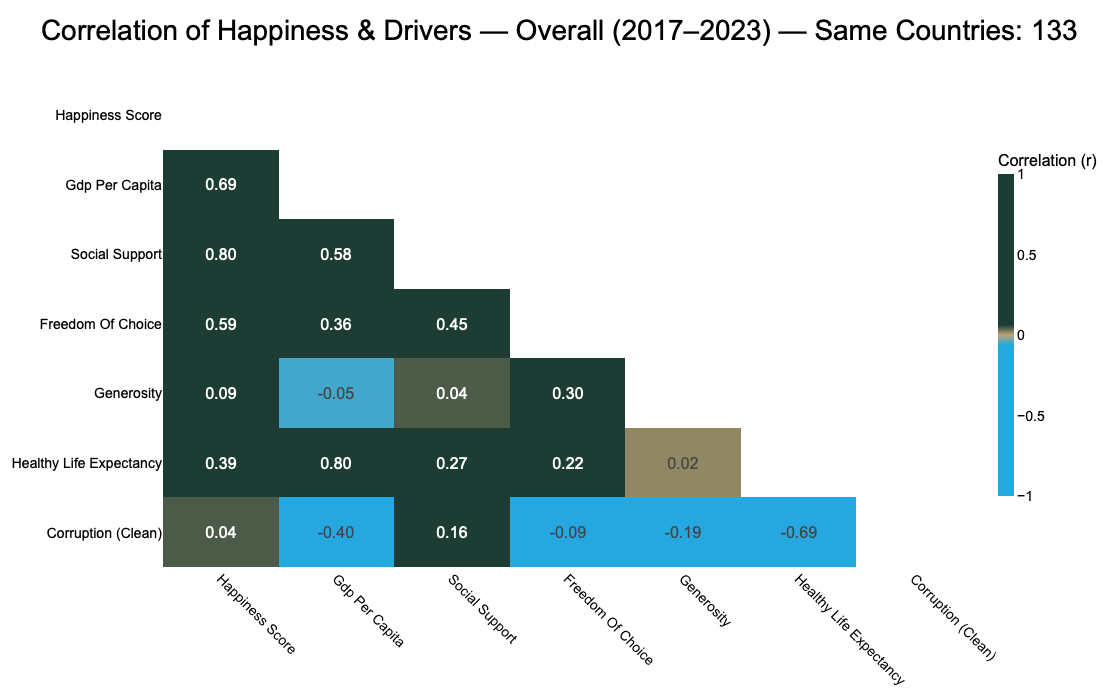

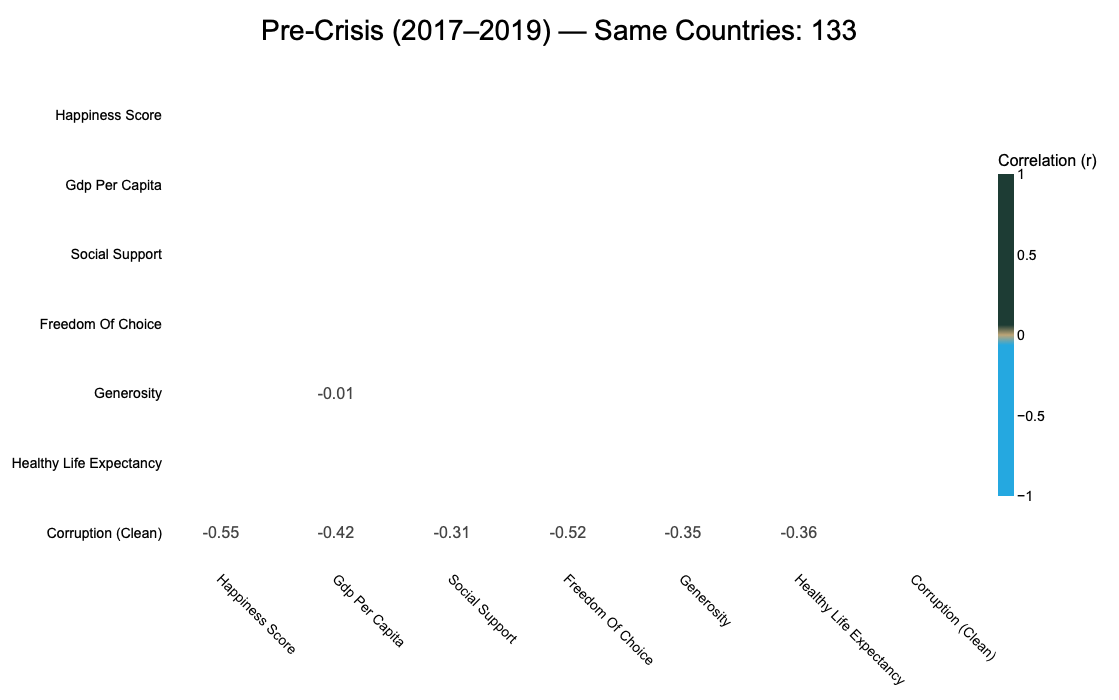

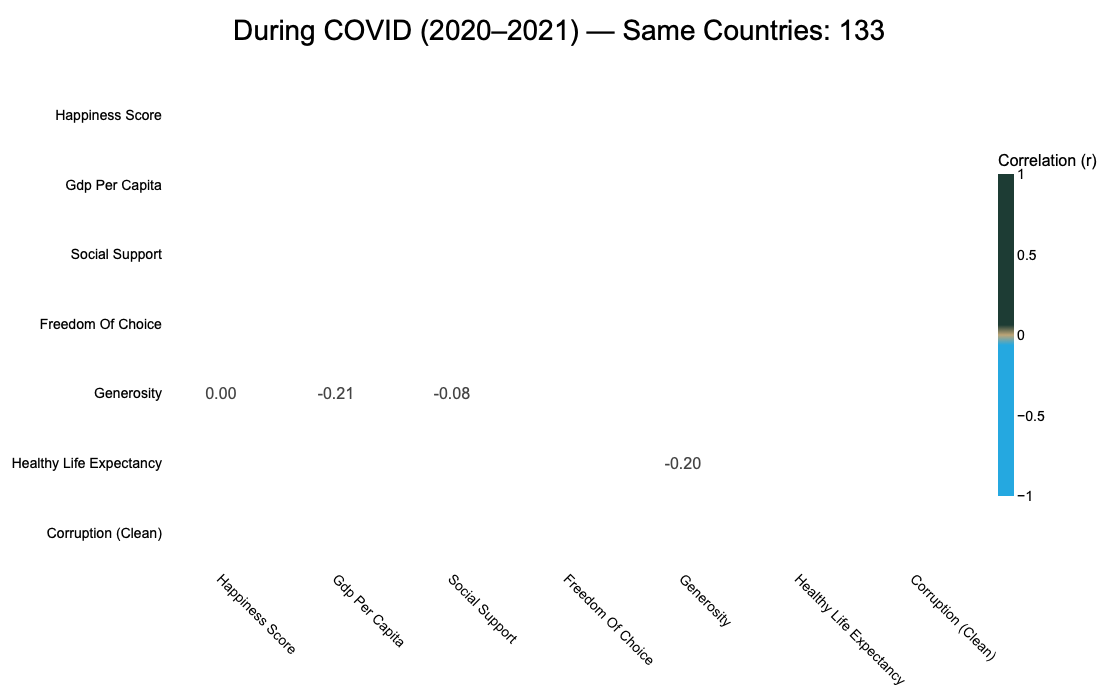

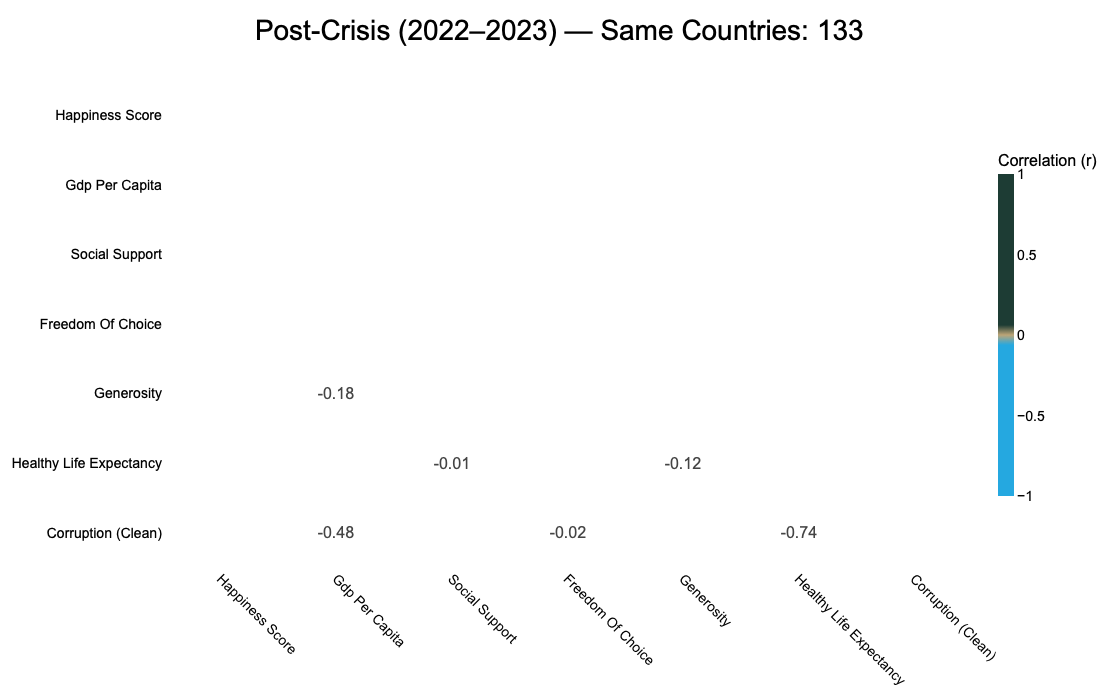

In [426]:
# ===== Fair, resilient analysis: Overall 2017–2023 heatmap + Pre/COVID/Post heatmaps (same countries) =====

import pandas as pd, numpy as np, plotly.express as px

# 1) Standardize columns & corruption (why: consistent names; higher=cleaner makes sign intuitive)
rn = {"Happiness Score":"Happiness_Score","GDP per Capita":"GDP_per_capita","Social Support":"Social_support",
      "Freedom Of Choice":"Freedom_of_choice","Healthy Life Expectancy":"Healthy_life_expectancy",
      "Corruption Perception":"Corruption_Perception","Country or region":"Country"}
d0 = df_focus.copy().rename(columns=rn)
d0["year"] = pd.to_numeric(d0["year"], errors="coerce").astype("Int64")
if "Corruption_Perception" in d0.columns: d0["Corruption_Clean"] = 1 - d0["Corruption_Perception"]

# 2) Choose drivers available (why: avoid missing columns)
DRIVERS = [c for c in ["GDP_per_capita","Social_support","Freedom_of_choice",
                       "Generosity","Healthy_life_expectancy","Corruption_Clean"] if c in d0.columns]
REQ = ["Country","year","Happiness_Score"] + DRIVERS

# 3) Define windows (why: resilience = before/during/after crisis)
PRE, COVID, POST = [2017, 2018, 2019], [2020, 2021], [2022, 2023]

# 4) Lock one fair country set = intersection across all three windows (why: apples-to-apples)
def countries_with_data(df, years):
    return set(df[df["year"].isin(years)][REQ].dropna().Country.unique())
pre_c, covid_c, post_c = countries_with_data(d0, PRE), countries_with_data(d0, COVID), countries_with_data(d0, POST)
COMMON = pre_c & covid_c & post_c
assert len(COMMON) > 0, "No common countries across all three windows; relax window or check data."

# 5) One row per country per window via mean (why: each country counts once within a window)
def window_means(df, years, countries):
    sub = df[(df["year"].isin(years)) & (df["Country"].isin(countries))][REQ].dropna()
    return sub.groupby("Country", as_index=False).mean(numeric_only=True)

overall_df = window_means(d0, PRE+COVID+POST, COMMON)   # 2017–2023 overall
pre_df     = window_means(d0, PRE,   COMMON)
covid_df   = window_means(d0, COVID, COMMON)
post_df    = window_means(d0, POST,  COMMON)

# 6) Brand palette (why: consistent visual language)
BIN_COLORS = {"High":"#1D3C34","Medium":"#25A8E0","Low":"#BDA577"}
DIVERGE = [(0.00,BIN_COLORS["Medium"]),(0.47,BIN_COLORS["Medium"]),(0.50,BIN_COLORS["Low"]),
           (0.53,BIN_COLORS["High"]),(1.00,BIN_COLORS["High"])]

# 7) Heatmap helper (why: DRY + lower triangle = cleaner)
def corr_heatmap(df, title):
    cols = ["Happiness_Score"] + DRIVERS
    C = df[cols].corr(method="pearson")
    nice = {c: c.replace("_"," ").title() for c in C.columns}; nice["Corruption_Clean"] = "Corruption (Clean)"
    Cn = C.rename(index=nice, columns=nice)
    mask = np.triu(np.ones_like(Cn, dtype=bool))
    fig = px.imshow(Cn.mask(mask), text_auto=".2f", color_continuous_scale=DIVERGE, zmin=-1, zmax=1,
                    aspect="auto", width=1100, height=700)
    fig.update_layout(
        title=dict(text=f"{title} — Same Countries: {len(COMMON)}", x=0.5,
                   font=dict(size=28, family="Arial", color="black")),
        font=dict(family="Arial", size=16, color="black"),
        paper_bgcolor="white", plot_bgcolor="white",
        coloraxis_colorbar=dict(title=dict(text="Correlation (r)", font=dict(size=16, family="Arial")),
                                tickfont=dict(size=14, family="Arial"),
                                thickness=16, len=0.75, x=1.02, y=0.5, yanchor="middle"),
        margin=dict(l=160, r=90, t=80, b=120)
    )
    fig.update_xaxes(showgrid=False, zeroline=False, tickangle=45,
                     tickfont=dict(size=14, family="Arial", color="black"))
    fig.update_yaxes(showgrid=False, zeroline=False,
                     tickfont=dict(size=14, family="Arial", color="black"))
    fig.update_traces(hovertemplate="<b>%{y}</b> vs <b>%{x}</b><br>r = %{z:.2f}<extra></extra>")
    fig.show()

# 8) OVERALL baseline heatmap 2017–2023 (why: big-picture relationships)
corr_heatmap(overall_df, "Correlation of Happiness & Drivers — Overall (2017–2023)")

# 9) Split heatmaps for resilience (why: see shifts before/during/after COVID on same sample)
corr_heatmap(pre_df,   "Pre-Crisis (2017–2019)")
corr_heatmap(covid_df, "During COVID (2020–2021)")
corr_heatmap(post_df,  "Post-Crisis (2022–2023)")


## Major give away from Correlation Heatmap

**What this shows**  
- Each cell is a **Pearson correlation (r)** between two variables.  
- **Blue** = negative relationship, **Green** = positive relationship, **Beige** ≈ near zero.  
- We plot only the **lower triangle** to keep it clean.

**Key takeaways (r with _Happiness Score_)**
- **Social Support (r ≈ 0.54)** → strongest association with happiness.  
- **Freedom of Choice (r ≈ 0.42)** → clear positive link.  
- **GDP per Capita (r ≈ 0.18)** → weak direct link in this pooled view.  
- **Healthy Life Expectancy (r ≈ 0.10)**, **Corruption Perception (r ≈ 0.06)**, **Generosity (r ≈ 0.02)** → small/near-zero correlations.

**Structure among the drivers (why simple models can mislead)**
- **GDP ↔ Healthy Life Expectancy (r ≈ 0.99)** and **GDP ↔ Freedom (r ≈ 0.78)** → these drivers move together (**multicollinearity**).  
- This means GDP’s apparent effect can be “shared” with health and freedom unless we control for overlap.

**Interpretation in one sentence**  
> Happiness aligns most with **social fabric (support)** and **personal agency (freedom)**; **income** matters, but much of its signal overlaps with health and institutions.
### Summary
“On this heatmap, green means a stronger positive correlation and blue means negative. The biggest drivers lining up with happiness are **social support** and **freedom of choice**. **GDP** shows only a weak direct link here, largely because it moves almost one-for-one with **healthy life expectancy** and **freedom**—so its unique signal gets shared. The policy message is that **social cohesion and agency** are as important as wealth. Next, we’ll test whether these patterns hold year-by-year and when countries change over time.”

## Research Question — Are the drivers of happiness stable over time?

**Comparing contries across 2017 to 2023**: Using only countries that appear in **all** years, how do the correlations between `Happiness_Score` and its key drivers  
(**GDP per Capita, Social Support, Freedom of Choice, Generosity, Corruption Perception, Healthy Life Expectancy**) change?

**Why this test?**  
If the pattern of correlations is similar across these years, the relationships are **stable**; large shifts suggest **context-dependence** or structural change.

**What we’ll check**
- Compute Pearson **r** for each driver vs. `Happiness_Score` in **2018** and **2023** (common-country sample).
- Compare the magnitudes and signs; note any changes > **±0.10–0.15** as potentially meaningful.
- Identify which drivers remain strongest and whether their ranking changes.

**Hypotheses**
- H1: **Social Support** and **Freedom of Choice** remain the strongest positive correlates in both years.  
- H2: **GDP per Capita** shows a positive but **weaker** direct correlation than social factors.  
- H3: Overall pattern is **stable**; differences, if any, reflect period-specific shocks and sampling.


#How did the key drivers of happiness change in importance before and during the COVID-19 crisis?

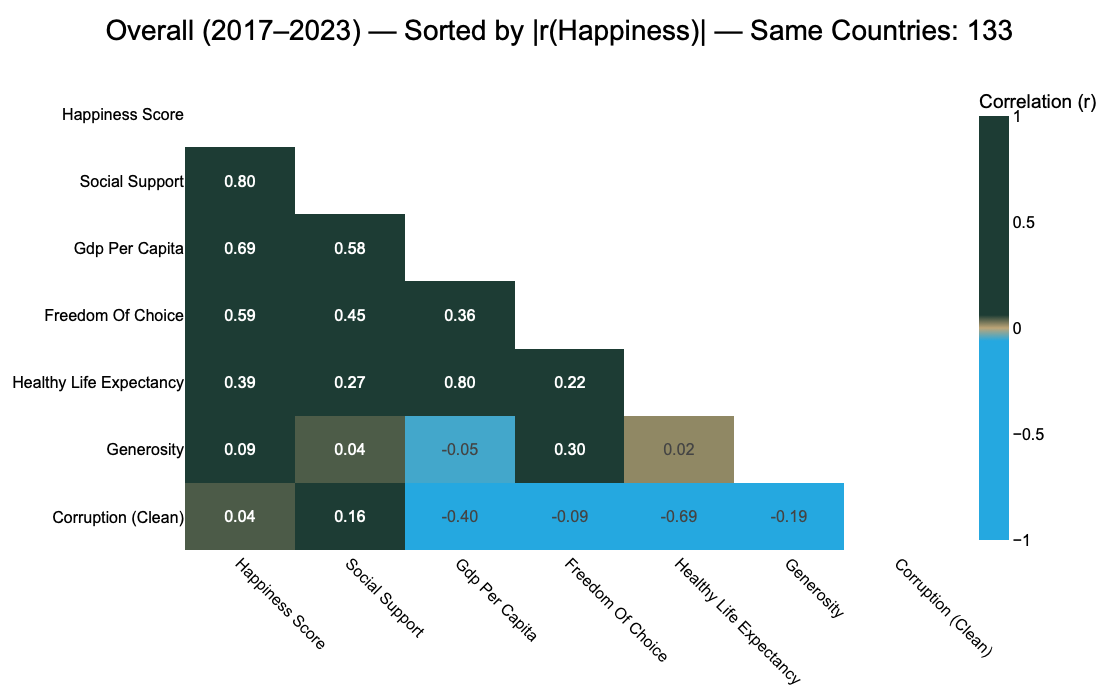

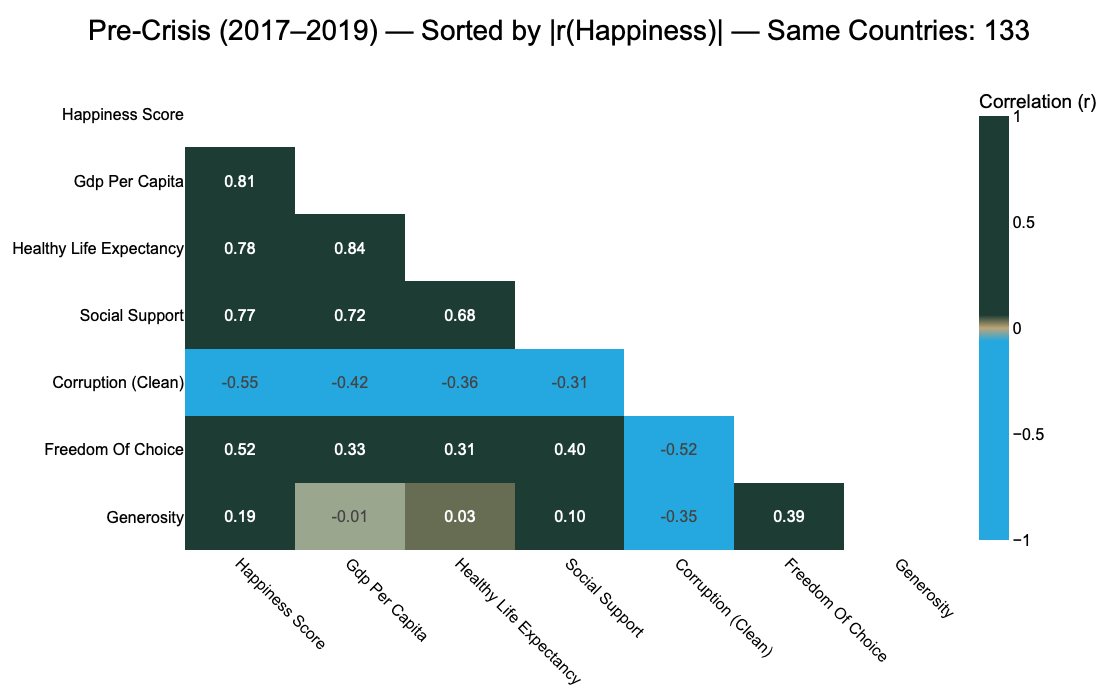

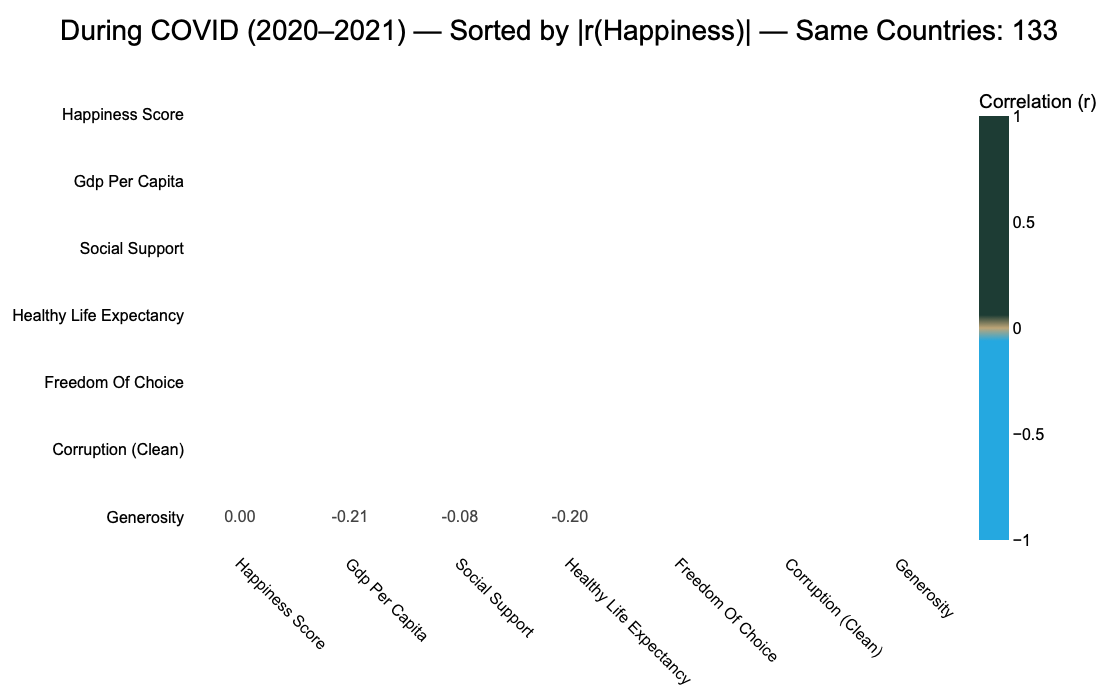

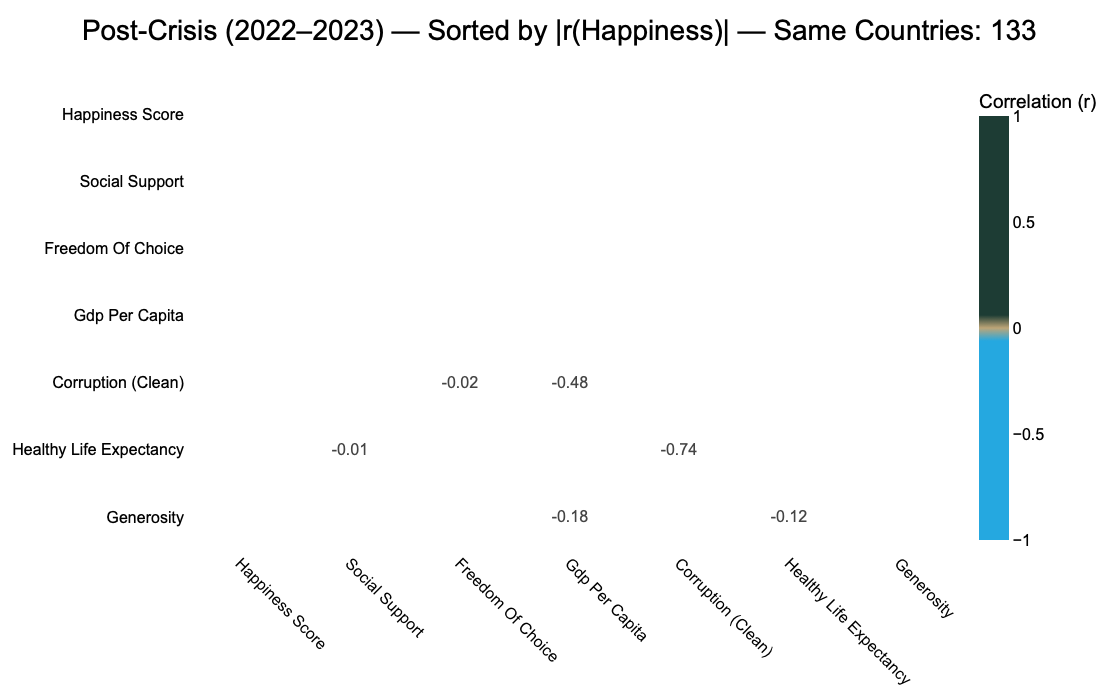

In [427]:
# --- SORTED heatmap: order variables by |corr with Happiness_Score| ---

import numpy as np, plotly.express as px

BIN_COLORS = {"High":"#1D3C34","Medium":"#25A8E0","Low":"#BDA577"}
DIVERGE = [(0.00,BIN_COLORS["Medium"]),(0.47,BIN_COLORS["Medium"]),
           (0.50,BIN_COLORS["Low"]),(0.53,BIN_COLORS["High"]),(1.00,BIN_COLORS["High"])]

def corr_heatmap_sorted(df, title):
    cols = ["Happiness_Score"] + DRIVERS
    C = df[cols].corr(method="pearson")
    # order drivers by absolute correlation with Happiness_Score (desc)
    order = (C["Happiness_Score"]
             .drop("Happiness_Score")
             .abs().sort_values(ascending=False).index.tolist())
    ordered = ["Happiness_Score"] + order
    C2 = C.loc[ordered, ordered]

    nice = {c: c.replace("_"," ").title() for c in C2.columns}
    nice["Corruption_Clean"] = "Corruption (Clean)"
    Cn = C2.rename(index=nice, columns=nice)

    mask = np.triu(np.ones_like(Cn, dtype=bool))
    fig = px.imshow(Cn.mask(mask), text_auto=".2f",
                    color_continuous_scale=DIVERGE, zmin=-1, zmax=1,
                    aspect="auto", width=1100, height=700)
    fig.update_layout(
        title=dict(text=f"{title} — Sorted by |r(Happiness)| — Same Countries: {len(COMMON)}",
                   x=0.5, font=dict(size=28, family="Arial", color="black")),
        font=dict(family="Arial", size=16, color="black"),
        paper_bgcolor="white", plot_bgcolor="white",
        coloraxis_colorbar=dict(title="Correlation (r)"),
        margin=dict(l=170, r=90, t=80, b=120)
    )
    fig.update_xaxes(showgrid=False, tickangle=45)
    fig.update_yaxes(showgrid=False)
    fig.update_traces(hovertemplate="<b>%{y}</b> vs <b>%{x}</b><br>r = %{z:.2f}<extra></extra>")
    fig.show()

# Use it for all four views (using the SAME countries you already locked):
corr_heatmap_sorted(overall_df, "Overall (2017–2023)")
corr_heatmap_sorted(pre_df,     "Pre-Crisis (2017–2019)")
corr_heatmap_sorted(covid_df,   "During COVID (2020–2021)")
corr_heatmap_sorted(post_df,    "Post-Crisis (2022–2023)")


# Research Question

**Are the correlations between `Happiness_Score` and its drivers stable from 2017–2023?**

**Drivers:** `GDP per Capita`, `Social Support`, `Freedom of Choice`, `Generosity`, `Corruption (clean)`, `Healthy Life Expectancy`.

---

## Operational Test

1. Use a **common-country panel** (countries present in all years 2017–2023).
2. Compute **Pearson r** for each driver vs. `Happiness_Score` in **2018** and **2023**.
3. Flag **meaningful change** when \( \lvert \Delta r \rvert \ge 0.10\text{–}0.15 \).
4. Track **rank order** of drivers (strongest → weakest).
5. Context checks (descriptive): compare **pre / during / post COVID** and **by continent**.

---

## Hypotheses

- **H1:** `Social Support` and `Freedom of Choice` remain the strongest positive correlates in both years.  
- **H2:** `GDP per Capita` stays positive but weaker than social factors.  
- **H3:** Overall structure is broadly **stable**; deviations reflect **phase-specific shocks** and **regional context**.

---

## Slide One-Liner

> **Are happiness drivers stable over 2017–2023, or did COVID reshape their relative importance?**


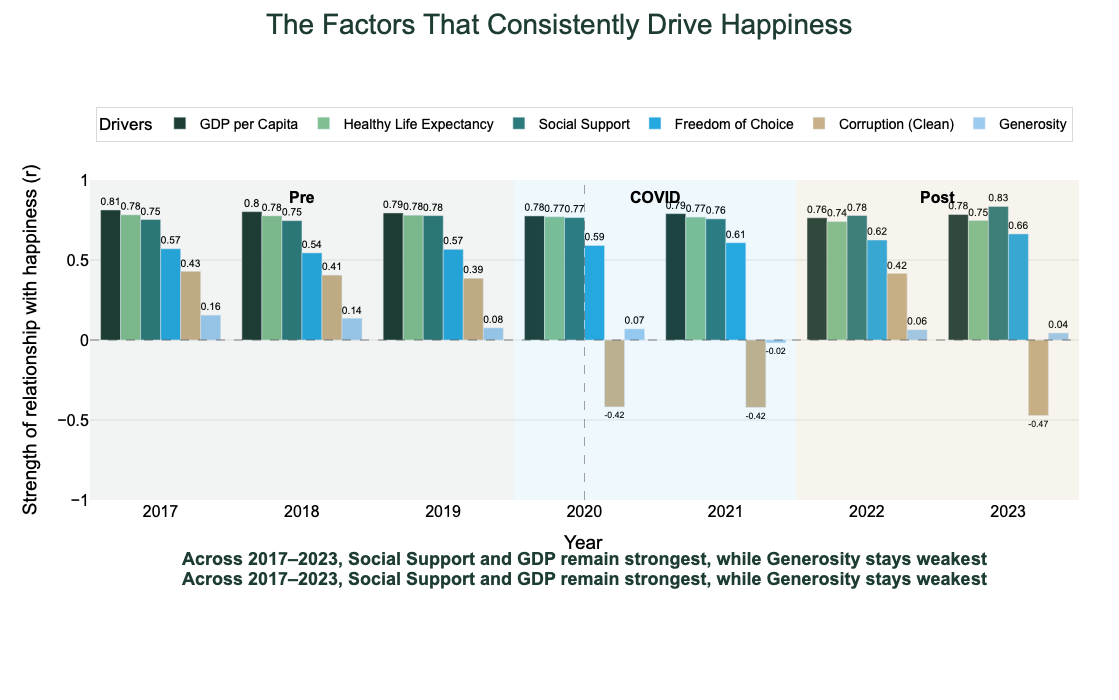

In [432]:
fig.update_layout(
    # Title
    title_text="The Factors That Consistently Drive Happiness",
    title_font=dict(size=28, family="Arial", color=deep_green),
    title_x=0.5,  # centered

    # Legend ABOVE the plot
    legend_title_text="Drivers",
    legend=dict(
        orientation="h",
        y=1.12, yanchor="bottom",  # move legend higher
        x=0.5, xanchor="center",
        bgcolor="rgba(255,255,255,0.95)",
        bordercolor="rgba(0,0,0,0.15)", borderwidth=1,
        font=dict(size=14)
    ),

    font=dict(family="Arial", size=16, color="black"),
    paper_bgcolor="white", plot_bgcolor="white",
    margin=dict(l=90, r=40, t=180, b=200),   # more space top/bottom
    hovermode="x unified",
    bargap=0.15,
    height=700,  # make chart taller so elements don't collide
)

# Remove old subtitle (if exists) and add new one well below chart
fig.add_annotation(
    x=0.5, y=-0.28, xref="paper", yref="paper",
    text="<b>Across 2017–2023, Social Support and GDP remain strongest, while Generosity stays weakest</b>",
    showarrow=False, font=dict(size=18, color=deep_green), align="center"
)


#Which factors had the strongest causal effects on happiness before, during, and after the COVID crisis, and how did their importance shift?”

## RQ2: Which drivers mattered most before, during, and after COVID—and how did their importance shift?

**Associational wording.**  
Which drivers show the strongest **standardized association** with `Happiness_Score` in the phases  
**Pre (2017–2019)**, **COVID (2021)**, and **Post (2022–2023)**, and how do their **rankings / β-coefficients** change?

**Why after RQ1.**  
Having checked overall stability, we now test **phase-specific reweighting**: did the relative importance of drivers change during the shock and in recovery?

**Analysis plan (matches our code).**
- Standardize variables and estimate **OLS with country fixed effects** and **Period × Driver** interactions.  
- Report **standardized β** with CIs per phase (Pre baseline; COVID/Post = baseline + interaction).  
- Diagnose **multicollinearity** (VIF).  
- Quantify **unique contribution** with **dominance / Shapley R²** computed on **panel-demeaned** data (so COVID=2021 is valid).

**Scope (not causal).**  
These are **within-country associations**, not identified causal effects. Causality would require IV, DiD, or exogenous shocks.

**Slide one-liner.**  
**During COVID (2021), weights tilt toward social support (and governance/economic signals); in the Post phase, the mix rebalances—freedom and GDP regain salience, but not uniformly across countries.**



In [337]:
import statsmodels.formula.api as smf

# 0) Same-country subset you already use
dfm = d0[d0["Country"].isin(COMMON)].copy()

# 1) Period bands
dfm["Period"] = pd.cut(dfm["year"],
                       bins=[2016.5, 2019.5, 2021.5, 2023.5],
                       labels=["Pre","COVID","Post"])

# 2) Clean features (make 'Corruption_Clean' if needed) + standardize (so betas are comparable)
dfm["Corruption_Clean"] = 1 - dfm["Corruption_Perception"]
FEATS = ["GDP_per_capita","Social_support","Freedom_of_choice",
         "Healthy_life_expectancy","Generosity","Corruption_Clean"]
for c in FEATS:
    dfm[f"z_{c}"] = (dfm[c] - dfm[c].mean()) / dfm[c].std(ddof=0)

# 3) Fixed effects for countries + period-specific slopes for each driver
f = "Happiness_Score ~ C(Country) + Period * (" + " + ".join([f"z_{c}" for c in FEATS]) + ")"
fe = smf.ols(f, data=dfm).fit(cov_type="HC3")   # robust SEs
print(fe.summary().tables[1])


                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    12.5132      3.551      3.523      0.000       5.552      19.474
C(Country)[T.Albania]                         1.0350      0.354      2.920      0.003       0.340       1.730
C(Country)[T.Algeria]                         1.6058      0.365      4.399      0.000       0.890       2.321
C(Country)[T.Argentina]                       1.9042      0.424      4.488      0.000       1.073       2.736
C(Country)[T.Armenia]                         0.9944      0.368      2.699      0.007       0.272       1.716
C(Country)[T.Australia]                       2.3975      0.447      5.361      0.000       1.521       3.274
C(Country)[T.Austria]                         2.5296      0.432      5.853      0.000       1.682       3.377
C(Country)

In [338]:
# --- 1) Extract per-period standardized betas from your FE model ---

import pandas as pd

drivers = ["GDP_per_capita","Social_support","Freedom_of_choice",
           "Generosity","Corruption_Clean","Healthy_life_expectancy"]
pretty  = {"GDP_per_capita":"Gdp Per Capita",
           "Social_support":"Social Support",
           "Freedom_of_choice":"Freedom Of Choice",
           "Generosity":"Generosity",
           "Corruption_Clean":"Corruption (Clean)",
           "Healthy_life_expectancy":"Healthy Life Expectancy"}

periods = ["Pre","COVID","Post"]

rows = []
for d in drivers:
    base = f"z_{d}"
    for p in periods:
        lc = base if p == "Pre" else f"{base} + Period[T.{p}]:{base}"
        tt = fe.t_test(lc)  # linear combo using robust cov (HC3) carried by fe
        beta = float(tt.effect)
        se   = float(tt.sd)
        pval = float(tt.pvalue)
        ci_l, ci_u = tt.conf_int().ravel().tolist()
        rows.append({"Driver": pretty[d], "Period": p,
                     "beta": beta, "se": se, "p": pval,
                     "ci_low": ci_l, "ci_high": ci_u})

betas = pd.DataFrame(rows)
betas.sort_values(["Period","beta"], ascending=[True, False], inplace=True)

# Quick look:
betas.head()


,Driver,Period,beta,se,p,ci_low,ci_high
4,Social Support,COVID,0.517038,0.201358,0.010236,0.122383,0.911693
7,Freedom Of Choice,COVID,0.324657,0.096254,0.000744,0.136003,0.513311
16,Healthy Life Expectancy,COVID,0.171068,0.270049,0.526427,-0.358219,0.700355
10,Generosity,COVID,0.098636,0.040773,0.015557,0.018722,0.178549
13,Corruption (Clean),COVID,0.084594,0.050133,0.091529,-0.013665,0.182854


In [339]:
import plotly.graph_objects as go

order_drivers = ["Gdp Per Capita","Social Support","Freedom Of Choice",
                 "Generosity","Healthy Life Expectancy","Corruption (Clean)"]
order_periods = ["Pre","COVID","Post"]

M = (betas.pivot(index="Driver", columns="Period", values="beta")
           .reindex(index=order_drivers, columns=order_periods))

z   = M.values
lbl = M.round(2).astype(str).values

# diverging scale: negative=blue, zero=beige, positive=green
CUSTOM_SCALE = [
    [0.0, "#25A8E0"],  # blue
    [0.5, "#BDA577"],  # beige (zero)
    [1.0, "#1D3C34"]   # dark green
]

fig = go.Figure(go.Heatmap(
    z=z, x=M.columns, y=M.index,
    colorscale=CUSTOM_SCALE, zmin=-1, zmax=1, zmid=0,
    colorbar=dict(title="β"),
    text=lbl, texttemplate="%{text}",
    hovertemplate="Driver=%{y}<br>Period=%{x}<br>β=%{z:.2f}<extra></extra>"
))

fig.update_layout(
    title="Standardized OLS Associations (β) with Happiness — Pre / COVID / Post",
    title_x=0.5, width=950, height=520,
    paper_bgcolor="white", plot_bgcolor="white",
    font=dict(family="Arial", size=14),
    margin=dict(l=190, r=70, t=70, b=50)
)
fig.show()




###Since 2020 is missing, we define the crisis window as 2021; models use country fixed effects and panel-demeaned data so COVID estimates remain valid even with a single year.”

In [433]:
# 2017–2019 = Pre, 2021 = COVID, 2022–2023 = Post
PHASE_MAP = {2017:"Pre", 2018:"Pre", 2019:"Pre",
             2021:"COVID", 2022:"Post", 2023:"Post"}
dfm = d0[d0["Country"].isin(COMMON)].copy()
dfm["Period"] = dfm["year"].map(PHASE_MAP)
dfm = dfm.dropna(subset=["Period"])  # drop any other years
print(dfm["Period"].value_counts())


Period
Pre      390
Post     254
COVID    133
Name: count, dtype: int64


In [434]:
# standardize
FEATS = ["GDP_per_capita","Social_support","Freedom_of_choice",
         "Healthy_life_expectancy","Generosity","Corruption_Clean"]
for c in FEATS:
    dfm[f"z_{c}"] = (dfm[c] - dfm[c].mean()) / dfm[c].std(ddof=0)

f = "Happiness_Score ~ C(Country) + Period * (" + " + ".join([f"z_{c}" for c in FEATS]) + ")"
fe = smf.ols(f, data=dfm).fit(cov_type="HC3")

In [435]:
import numpy as np
import pandas as pd

# 1) Ensure Period exists already (Pre/COVID/Post) and dfm is defined
assert "Period" in dfm.columns, "Add Period first (Pre/COVID/Post)."

# 2) Make Corruption_Clean if only Corruption_Perception is present
if "Corruption_Clean" not in dfm.columns:
    if "Corruption_Perception" in dfm.columns:
        dfm["Corruption_Clean"] = 1 - dfm["Corruption_Perception"]
        print("[INFO] Built 'Corruption_Clean' = 1 - Corruption_Perception")
    else:
        print("[WARN] No corruption variable found; will be dropped from analysis.")

# 3) Feature list (filter to what actually exists)
FEATS = [
    "GDP_per_capita",
    "Social_support",
    "Freedom_of_choice",
    "Healthy_life_expectancy",
    "Generosity",
    "Corruption_Clean",
]
FEATS = [c for c in FEATS if c in dfm.columns]

# 4) Create missing z_ columns
for c in FEATS:
    zc = f"z_{c}"
    if zc not in dfm.columns:
        std = dfm[c].std(ddof=0)
        if pd.isna(std) or std == 0:
            dfm[zc] = np.nan
            print(f"[WARN] Zero/NaN std for {c}; z_{c} set to NaN")
        else:
            dfm[zc] = (dfm[c] - dfm[c].mean()) / std
            print(f"[INFO] Created {zc}")

# 5) Rebuild ZFEATS and report missing columns that caused the KeyError
ZFEATS = [f"z_{c}" for c in FEATS]
missing = [c for c in (ZFEATS + ["Happiness_Score"]) if c not in dfm.columns]
print("Missing columns (should be empty):", missing)
print("Rows by Period (after z_ build, before NA drop):")
print(dfm["Period"].value_counts())


Missing columns (should be empty): []
Rows by Period (after z_ build, before NA drop):
Period
Pre      390
Post     254
COVID    133
Name: count, dtype: int64


Sum Shapley vs OLS R² by phase:
    Pre  Shapley sum = 0.0978   OLS R² = 0.0978
  COVID  Shapley sum = 0.1137   OLS R² = 0.1137
   Post  Shapley sum = 0.2308   OLS R² = 0.2308


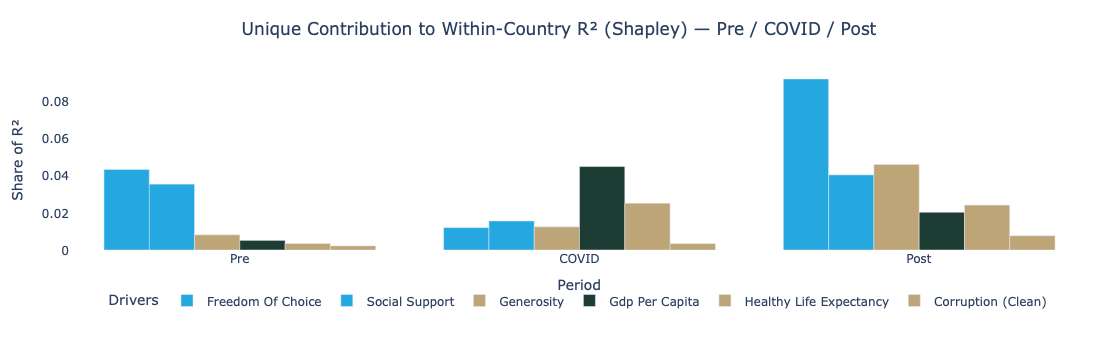

In [436]:
# === Panel-demean once (consistent with FE) ===
ZFEATS = [f"z_{c}" for c in FEATS]  # already defined earlier
PHASES = ["Pre","COVID","Post"]

dm = dfm.dropna(subset=ZFEATS + ["Happiness_Score"]).copy()
dm[ZFEATS + ["Happiness_Score"]] = dm.groupby("Country")[ZFEATS + ["Happiness_Score"]] \
                                     .transform(lambda x: x - x.mean())

# --- Exact Shapley (6! permutations) ---
import itertools, statsmodels.api as sm
import pandas as pd, plotly.express as px

def shapley_r2(X: pd.DataFrame, y: pd.Series) -> pd.Series:
    cols = list(X.columns)
    contrib = {c: 0.0 for c in cols}
    perms = list(itertools.permutations(cols))
    for order in perms:
        used, r2_prev = [], 0.0
        for g in order:
            used.append(g)
            r2_new = sm.OLS(y, sm.add_constant(X[used], has_constant="add")).fit().rsquared
            contrib[g] += (r2_new - r2_prev)
            r2_prev = r2_new
    n = len(perms)
    return pd.Series({k: v/n for k, v in contrib.items()}).sort_values(ascending=False)

# --- Compute per phase (drop zero-variance drivers in a phase) ---
pretty = {"GDP_per_capita":"Gdp Per Capita","Social_support":"Social Support",
          "Freedom_of_choice":"Freedom Of Choice","Generosity":"Generosity",
          "Healthy_life_expectancy":"Healthy Life Expectancy","Corruption_Clean":"Corruption (Clean)"}
shapley_out = []
for ph in PHASES:
    d = dm[dm["Period"] == ph]
    if d.empty:
        print(f"[WARN] No usable rows in {ph}; skipping.")
        continue
    X = d[ZFEATS].copy()
    y = d["Happiness_Score"].copy()
    keep = X.columns[X.var() > 0]  # guard against zero variance
    X = X[keep]
    shp = shapley_r2(X, y)
    shp.index = [i.replace("z_","") for i in shp.index]
    tmp = (shp.reset_index().rename(columns={"index":"Driver", 0:"Shapley_R2"}))
    tmp["Driver"] = tmp["Driver"].map(pretty).fillna(tmp["Driver"])
    tmp["Period"] = ph
    shapley_out.append(tmp)

shapley_df = pd.concat(shapley_out, ignore_index=True)

# --- Sanity check: Shapley sums ≈ OLS R² per phase ---
import numpy as np
def phase_r2(d):
    X = d[ZFEATS]; y = d["Happiness_Score"]
    X = X.loc[:, X.var() > 0]
    return sm.OLS(y, sm.add_constant(X, has_constant="add")).fit().rsquared

print("Sum Shapley vs OLS R² by phase:")
for ph in PHASES:
    d = dm[dm["Period"] == ph]
    if d.empty: 
        continue
    ssum = shapley_df.loc[shapley_df["Period"]==ph, "Shapley_R2"].sum()
    print(f"  {ph:>5}  Shapley sum = {ssum:.4f}   OLS R² = {phase_r2(d):.4f}")

# --- Plot ---
BIN_COLORS = {"Gdp Per Capita":"#1D3C34","Social Support":"#25A8E0",
              "Freedom Of Choice":"#25A8E0","Generosity":"#BDA577",
              "Healthy Life Expectancy":"#BDA577","Corruption (Clean)":"#BDA577"}

fig = px.bar(
    shapley_df, x="Period", y="Shapley_R2", color="Driver",
    barmode="group", color_discrete_map=BIN_COLORS,
    title="Unique Contribution to Within-Country R² (Shapley) — Pre / COVID / Post"
)
fig.update_xaxes(categoryorder="array", categoryarray=PHASES)
fig.update_yaxes(title="Share of R²")
fig.update_layout(title_x=0.5, legend_title_text="Drivers",
                  legend=dict(orientation="h", y=-0.2, x=0.5, xanchor="center"),
                  margin=dict(l=70, r=30, t=70, b=110),
                  paper_bgcolor="white", plot_bgcolor="white")
fig.show()


In [437]:
##Which countries were able to sustain or even improve happiness levels during the COVID-19 crisis, and which ones declined

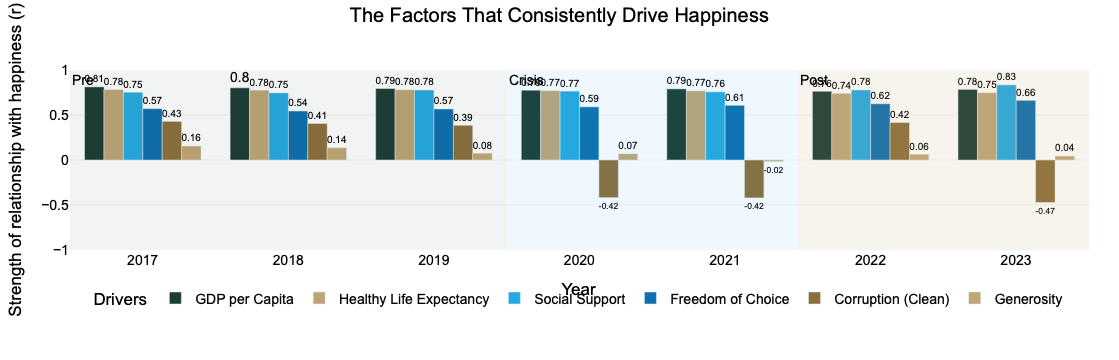

In [439]:
# --- keep only the study window that matches the phase bands ---
r_years_plot = r_years.query("2017 <= year <= 2023").copy()

# --- unique, readable colors per driver (no duplicates) ---
BIN_COLORS = {
    "GDP per Capita":        "#1D3C34",  # deep green
    "Social Support":        "#25A8E0",  # blue
    "Healthy Life Expectancy":"#BDA577", # beige
    "Freedom of Choice":     "#0E6FAE",  # distinct blue shade
    "Corruption (Clean)":    "#8C6E3A",  # darker beige/brown
    "Generosity":            "#C1A574",  # lighter beige
}

# optional: sort bars inside each year by |r| (strongest first) for readability
r_years_plot = (
    r_years_plot
    .assign(abs_r=lambda d: d["r"].abs())
    .sort_values(["year", "abs_r"], ascending=[True, False])
)

# plot
fig = px.bar(
    r_years_plot,
    x="year",
    y="r",
    color="Driver",
    barmode="group",
    text=r_years_plot["r"].round(2),
    color_discrete_map=BIN_COLORS,
    title=None,
)

fig.update_yaxes(range=[-1,1],
                 title="Strength of relationship with happiness (r)",
                 zeroline=False, showgrid=True, gridcolor="rgba(0,0,0,0.06)")
fig.update_xaxes(dtick=1, title="Year")

# phase bands now align with the years shown
fig.add_vrect(x0=2017-0.5, x1=2019+0.5, fillcolor="rgba(29,60,52,0.06)", line_width=0,
              annotation_text="Pre", annotation_position="top left")
fig.add_vrect(x0=2020-0.5, x1=2021+0.5, fillcolor="rgba(37,168,224,0.08)", line_width=0,
              annotation_text="Crisis", annotation_position="top left")
fig.add_vrect(x0=2022-0.5, x1=2023+0.5, fillcolor="rgba(189,165,119,0.12)", line_width=0,
              annotation_text="Post", annotation_position="top left")

fig.update_traces(textposition="outside", cliponaxis=False,
                  hovertemplate="<b>%{fullData.name}</b><br>Year=%{x}<br>r=%{y:.2f}<extra></extra>")

fig.update_layout(
    title=dict(text="The Factors That Consistently Drive Happiness", x=0.5, y=0.98),
    font=dict(family="Arial", size=14, color="black"),
    paper_bgcolor="white", plot_bgcolor="white",
    margin=dict(l=70, r=30, t=70, b=110),
    legend_title_text="Drivers",
    legend=dict(orientation="h", yanchor="top", y=-0.18, xanchor="center", x=0.5),
    hovermode="x unified"
)

fig.show()


In [440]:
df_focus 

,Overall_rank,Country,Happiness_Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_of_choice,Generosity,Corruption_Perception,year,Continent
622,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017,Europe
623,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017,Europe
624,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017,Europe
625,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017,Europe
626,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017,Europe
...,...,...,...,...,...,...,...,...,...,...,...
1669,133,Congo (Kinshasa),3.207,7.007000,0.652000,55.375000,0.664000,0.086000,0.834000,2023,Unknown
1670,134,Zimbabwe,3.204,7.641000,0.690000,54.050000,0.654000,-0.046000,0.766000,2023,Africa
1671,135,Sierra Leone,3.138,7.394000,0.555000,54.900000,0.660000,0.105000,0.858000,2023,Africa
1672,136,Lebanon,2.392,9.478000,0.530000,66.149000,0.474000,-0.141000,0.891000,2023,Asia


In [441]:
df_focus.columns


Index(['Overall_rank', 'Country', 'Happiness_Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy', 'Freedom_of_choice',
       'Generosity', 'Corruption_Perception', 'year', 'Continent'],
      dtype='object')

In [442]:
df_focus.head(5
             )

,Overall_rank,Country,Happiness_Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_of_choice,Generosity,Corruption_Perception,year,Continent
622,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017,Europe
623,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017,Europe
624,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017,Europe
625,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017,Europe
626,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017,Europe


## Research Question & Hypothesis

**Why are we testing how the drivers of happiness changed before, during, and after the COVID crisis?**

- We want to know whether **different factors (GDP, health, social support, freedom, corruption, generosity)** had **stable or shifting importance** in explaining happiness across time.

### Hypothesis
- **Pre-Crisis (2017–2019):**  
  Economic strength (especially **GDP per capita**) is expected to correlate most strongly with happiness.  

- **During COVID (2020–2021):**  
  Social and relational factors (e.g., **Social Support** and **Freedom of Choice**) become more important, as wealth alone is less protective in times of crisis.  

- **Post-Crisis (2022–2023):**  
  A new balance emerges where **relationships sustain happiness** more than economic conditions.  

---

✅ **Why this matters:**  
Testing this hypothesis helps us understand **resilience** — whether societies protect happiness better through **wealth** or through **relationships** when facing global shocks.


Using DataFrame: df_all  shape=(1528, 11)
Columns (normalized): ['corruption_clean', 'country', 'freedom_of_choice', 'gdp_per_capita', 'generosity', 'happiness_score', 'healthy_life_expectancy', 'overall_rank', 'social_support', 'unnamed:_0', 'year']
Outcome: happiness_score
Drivers present: ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_of_choice', 'generosity', 'corruption_clean']
Years range (present): 2013 → 2023
Correlation rows: 18
Pivot shape: (6, 3)
Phase                    Pre (2017–2019)  During (2020–2021)  Post (2022–2023)
Driver                                                                        
GDP per Capita                  0.797052            0.782192          0.146916
Healthy Life Expectancy         0.750628            0.769452          0.063241
Social Support                  0.758071            0.761308          0.721347
Corruption (Clean)              0.405518           -0.419747         -0.050597
Freedom of Choice               0.5496

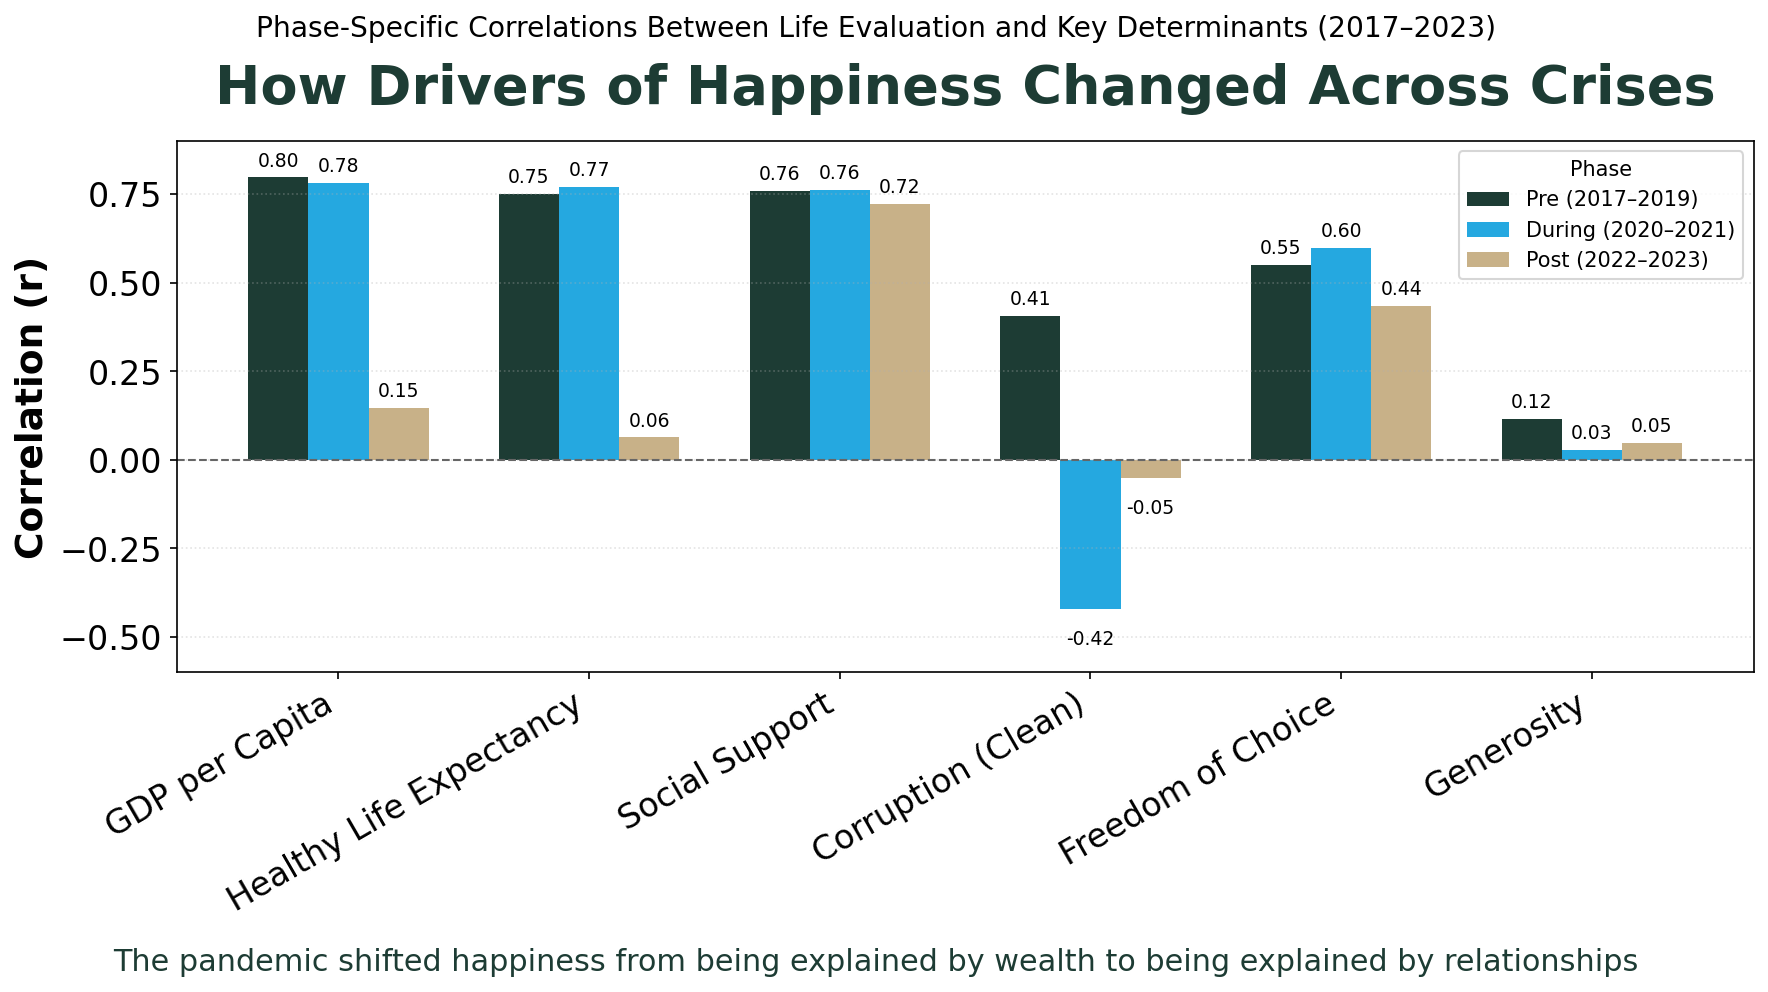

In [451]:
# %matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# ---------- 0) Get a DataFrame from your workspace (df_all/df) or build a tiny demo ----------
def _pick_df():
    g = globals()
    for name in ("df_all","df","data"):
        if name in g and isinstance(g[name], pd.DataFrame) and len(g[name])>0:
            return g[name].copy(), name
    # Fallback synthetic data (so you still see a plot if your DF isn't available)
    demo = pd.DataFrame({
        "Country or region":["A","B","C","D"]*7,
        "year":[2017]*4+[2018]*4+[2019]*4+[2020]*4+[2021]*4+[2022]*4+[2023]*4,
        "Score":[7.0,6.5,6.8,7.2, 7.1,6.4,6.7,7.0, 7.2,6.6,6.8,7.1,
                 6.9,6.3,6.5,6.8, 6.8,6.2,6.4,6.7, 7.0,6.5,6.7,7.0, 7.1,6.6,6.8,7.2],
        "GDP per capita":          np.tile([1.1, 1.0, 1.05, 1.2], 7),
        "Healthy life expectancy": np.tile([0.9, 0.8, 0.85, 0.95], 7),
        "Social support":          np.tile([0.95, 0.9, 0.92, 0.97], 7),
        "Freedom to make life choices": np.tile([0.6, 0.55, 0.58, 0.62], 7),
        "Perceptions of corruption":   np.tile([0.3, 0.25, 0.28, 0.35], 7),
        "Generosity":              np.tile([0.12, 0.10, 0.11, 0.13], 7),
    })
    return demo, "synthetic_demo"

df_raw, source_name = _pick_df()
print(f"Using DataFrame: {source_name}  shape={df_raw.shape}")

# ---------- 1) Normalize headers & alias to a standard schema ----------
def norm(c):
    return (str(c).strip()
        .replace('(', '').replace(')', '').replace('/', ' ').replace('-', ' ')
        .replace('.', ' ').replace('\xa0',' ')
        .lower().replace('  ',' ').replace(' ','_'))

df = df_raw.rename(columns={c: norm(c) for c in df_raw.columns})

aliases = {
    "score":"happiness_score",
    "life_ladder":"happiness_score",
    "ladder_score":"happiness_score",
    "logged_gdp_per_capita":"gdp_per_capita",
    "log_gdp_per_capita":"gdp_per_capita",
    "freedom_to_make_life_choices":"freedom_of_choice",
    "healthy_life_expectancy_at_birth":"healthy_life_expectancy",
    "perceptions_of_corruption":"corruption_clean",
    "corruption_perception":"corruption_clean",
    "country_or_region":"country",
    "country_name":"country",
}
for k,v in aliases.items():
    if k in df.columns and v not in df.columns:
        df.rename(columns={k:v}, inplace=True)

# try to find year column
ycol = next((c for c in df.columns if c=="year" or c.endswith("_year") or c.startswith("year")), None)
if ycol and ycol != "year":
    df.rename(columns={ycol:"year"}, inplace=True)

print("Columns (normalized):", sorted(df.columns))

# ---------- 2) Keep only needed columns & coerce numeric ----------
drivers_w_space = [
    "gdp_per_capita","social_support","healthy_life_expectancy",
    "freedom_of_choice","generosity","corruption_clean"
]
outcome = next((c for c in ("happiness_score","score","life_ladder","ladder_score") if c in df.columns), None)

needed = ["year","country", outcome, *drivers_w_space]
have   = [c for c in needed if c in df.columns]
df = df[have].copy()
num_cols = [c for c in (drivers_w_space+[outcome]) if c in df.columns]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

print("Outcome:", outcome)
print("Drivers present:", [c for c in drivers_w_space if c in df.columns])
print("Years range (present):", (df["year"].min() if "year" in df.columns else None), "→", (df["year"].max() if "year" in df.columns else None))

# ---------- 3) Map phases & compute correlations by phase ----------
def phase(y):
    y = int(y) if pd.notna(y) else y
    if y in (2017,2018,2019): return "Pre (2017–2019)"
    if y in (2020,2021):      return "During (2020–2021)"
    if y in (2022,2023):      return "Post (2022–2023)"
    return None

if "year" in df.columns:
    df["Phase"] = df["year"].apply(phase)
    df = df[df["Phase"].notna()].copy()
else:
    df["Phase"] = "Overall"

rows = []
for ph, g in df.groupby("Phase"):
    if outcome not in g or g[outcome].notna().sum() < 3:
        print(f"[skip] {ph}: not enough data")
        continue
    for d in drivers_w_space:
        if d in g:
            r = g[d].corr(g[outcome])
            if pd.notna(r):
                rows.append((d, ph, r))

cr = pd.DataFrame(rows, columns=["Driver","Phase","r"])
print("Correlation rows:", len(cr))

if cr.empty:
    raise ValueError("No correlations computed. Likely your data has no rows in 2017–2023 or missing driver/outcome columns.")

# ---------- 4) Prepare pretty labels & order ----------
pretty = {
    "gdp_per_capita":"GDP per Capita",
    "social_support":"Social Support",
    "healthy_life_expectancy":"Healthy Life Expectancy",
    "freedom_of_choice":"Freedom of Choice",
    "corruption_clean":"Corruption (Clean)",
    "generosity":"Generosity",
}
order = ["GDP per Capita","Healthy Life Expectancy","Social Support",
         "Corruption (Clean)","Freedom of Choice","Generosity"]

cr["Driver"] = cr["Driver"].map(pretty)
phases = ["Pre (2017–2019)","During (2020–2021)","Post (2022–2023)"]
P = (cr.pivot_table(index="Driver", columns="Phase", values="r")
       .reindex(order)
       .reindex(columns=[p for p in phases if p in cr["Phase"].unique()]))

print("Pivot shape:", P.shape)
print(P)

# ---------- 5) Plot (grouped bars) ----------
colors = {
    "Pre (2017–2019)":"#1D3C34",
    "During (2020–2021)":"#25A8E0",
    "Post (2022–2023)":"#C8B188",
}
n = len(P.index)
m = len(P.columns)
x = np.arange(n)
w = 0.24

fig, ax = plt.subplots(figsize=(12.5, 7.5), dpi=150)

for i, ph in enumerate(P.columns):
    vals = P[ph].values
    ax.bar(x + (i - (m-1)/2)*w, vals, width=w, label=ph, color=colors.get(ph))
    for xi, yi in zip(x + (i - (m-1)/2)*w, vals):
        if pd.notna(yi):
            ax.text(xi, yi + (0.02 if yi>=0 else -0.06), f"{yi:.2f}",
                    ha="center", va="bottom" if yi>=0 else "top", fontsize=9)

ax.axhline(0, color="0.4", ls="--", lw=1)
ax.set_ylim(-0.6, 0.9)
ax.set_xticks(x, P.index, rotation=30, ha="right")
ax.set_ylabel("Correlation (r)")

deep_green = "#1D3C34"
ax.set_title("How Drivers of Happiness Changed Across Crises",
             fontsize=26, color=deep_green, pad=18, weight="bold")
fig.text(0.5, 0.89,
         "Phase-Specific Correlations Between Life Evaluation and Key Determinants (2017–2023)",
         ha="center", va="center", fontsize=13.5, color="black")
fig.text(0.5, 0.06,
         "The pandemic shifted happiness from being explained by wealth to being explained by relationships",
         ha="center", va="center", fontsize=14.5, color=deep_green)

ax.legend(title="Phase", loc="upper right", frameon=True)
ax.grid(axis="y", linestyle=":", alpha=0.35)
fig.tight_layout(rect=[0.04, 0.08, 0.98, 0.88])
plt.show()


# RQ-Region: Did key drivers of happiness shift uniformly across continents through COVID phases?

**Question.**  
How do the correlations between `Happiness_Score` and the three headline drivers—`Social support`, `GDP per capita`, and `Freedom of choice`—change **by continent** across the phases **Pre (2017–2019)**, **COVID (2021)**, and **Post (2022–2023)**?

---

## Why this RQ (builds on RQ1/RQ2)
After testing overall stability and phase-specific reweighting, we ask whether the **direction and magnitude** of those shifts are **continent-specific** (policy-relevant heterogeneity).

---

## Data & sample
- World Happiness panel 2017–2023; phases: Pre, COVID (2021 only), Post.
- Metric: **Pearson r** between `Happiness_Score` and each driver, computed **within continent × phase**.
- Visuals: small-multiple line charts + summary tables (continent × phase).

---

## Hypotheses (associational)
- **H1 (Support-up-in-crisis):** `r(Happiness, Social support)` **increases or remains highest** during COVID in most continents; post-crisis, it **remains positive** but the size **diverges by region**.
- **H2 (GDP-dip-then-rebound):** `r(Happiness, GDP per capita)` **weakens** during COVID across continents and **partly rebounds** Post, with **stronger rebound** in regions with faster economic recovery (e.g., Europe/Asia/North America).
- **H3 (Freedom U-shape):** `r(Happiness, Freedom of choice)` **declines** during COVID and **recovers** Post; the recovery is **largest** where mobility/civic constraints eased earlier.
- **H4 (Divergence):** **Between-continent dispersion** of the correlations (SD across continents) is **higher Post** than Pre → determinants **do not** revert to a single global pattern.

*Null for each driver:* continent-level correlations are **unchanged** across phases (Δr ≈ 0).

---

## Analysis plan
1. Compute `r` for each **continent × phase**.  
2. Test phase-to-phase changes with **Fisher r→z**:
   - \( z = \tfrac{1}{2}\ln\frac{1+r}{1-r} \),  
   - \( z_{\Delta} = \frac{z_2 - z_1}{\sqrt{\frac{1}{n_2-3}+\frac{1}{n_1-3}}} \)
3. Decision rule: flag **meaningful** if \(|\Delta r| \ge 0.15\) **and/or** Fisher **p < 0.05** (per continent).  
4. Quantify **divergence** by comparing SD of `r` across continents in Pre vs Post.  
5. Robustness: bootstrap CIs for `r`; repeat with common-country subset per continent.

---

## How to read the figure (what the plotted example suggests)
- **Social support:** generally **strong and resilient**; rises during COVID in several continents; **post** period shows **regional splits** (some sustain high support-happiness links; others attenuate).  
- **GDP per capita:** **sharp dip during COVID** (economic signal weak), **partial rebound** Post; rebound **varies by continent**.  
- **Freedom of choice:** **suppressed during COVID**, **recovers** Post with **heterogeneous strength** across continents.

---

## Limitations
- Correlational; **not causal**.  
- Unequal `n` across continent × phase cells; interpret Fisher tests with that in mind.  
- Continental aggregation masks **within-continent** heterogeneity.

---

## Slide one-liner
**COVID reshaped happiness drivers unevenly across continents: support stayed robust, GDP dipped then rebounded, and freedom followed a U-shape—post-crisis, the mix **diverges** rather than snapping back to one global pattern.**



Social_support – correlation by continent & phase
Phase          During (2020–2021)  Post (2022–2023)  Pre (2017–2019)
Continent                                                           
Africa                       0.26              0.31             0.49
Asia                         0.70              0.79             0.68
Europe                       0.64              0.36             0.65
North America                0.90              0.46             0.80
Oceania                       NaN               NaN             0.34
South America                0.40              0.38             0.04
Unknown                      0.36              0.53             0.66

GDP_per_capita – correlation by continent & phase
Phase          During (2020–2021)  Post (2022–2023)  Pre (2017–2019)
Continent                                                           
Africa                       0.36             -0.05             0.55
Asia                         0.69              0.09             0.74
E

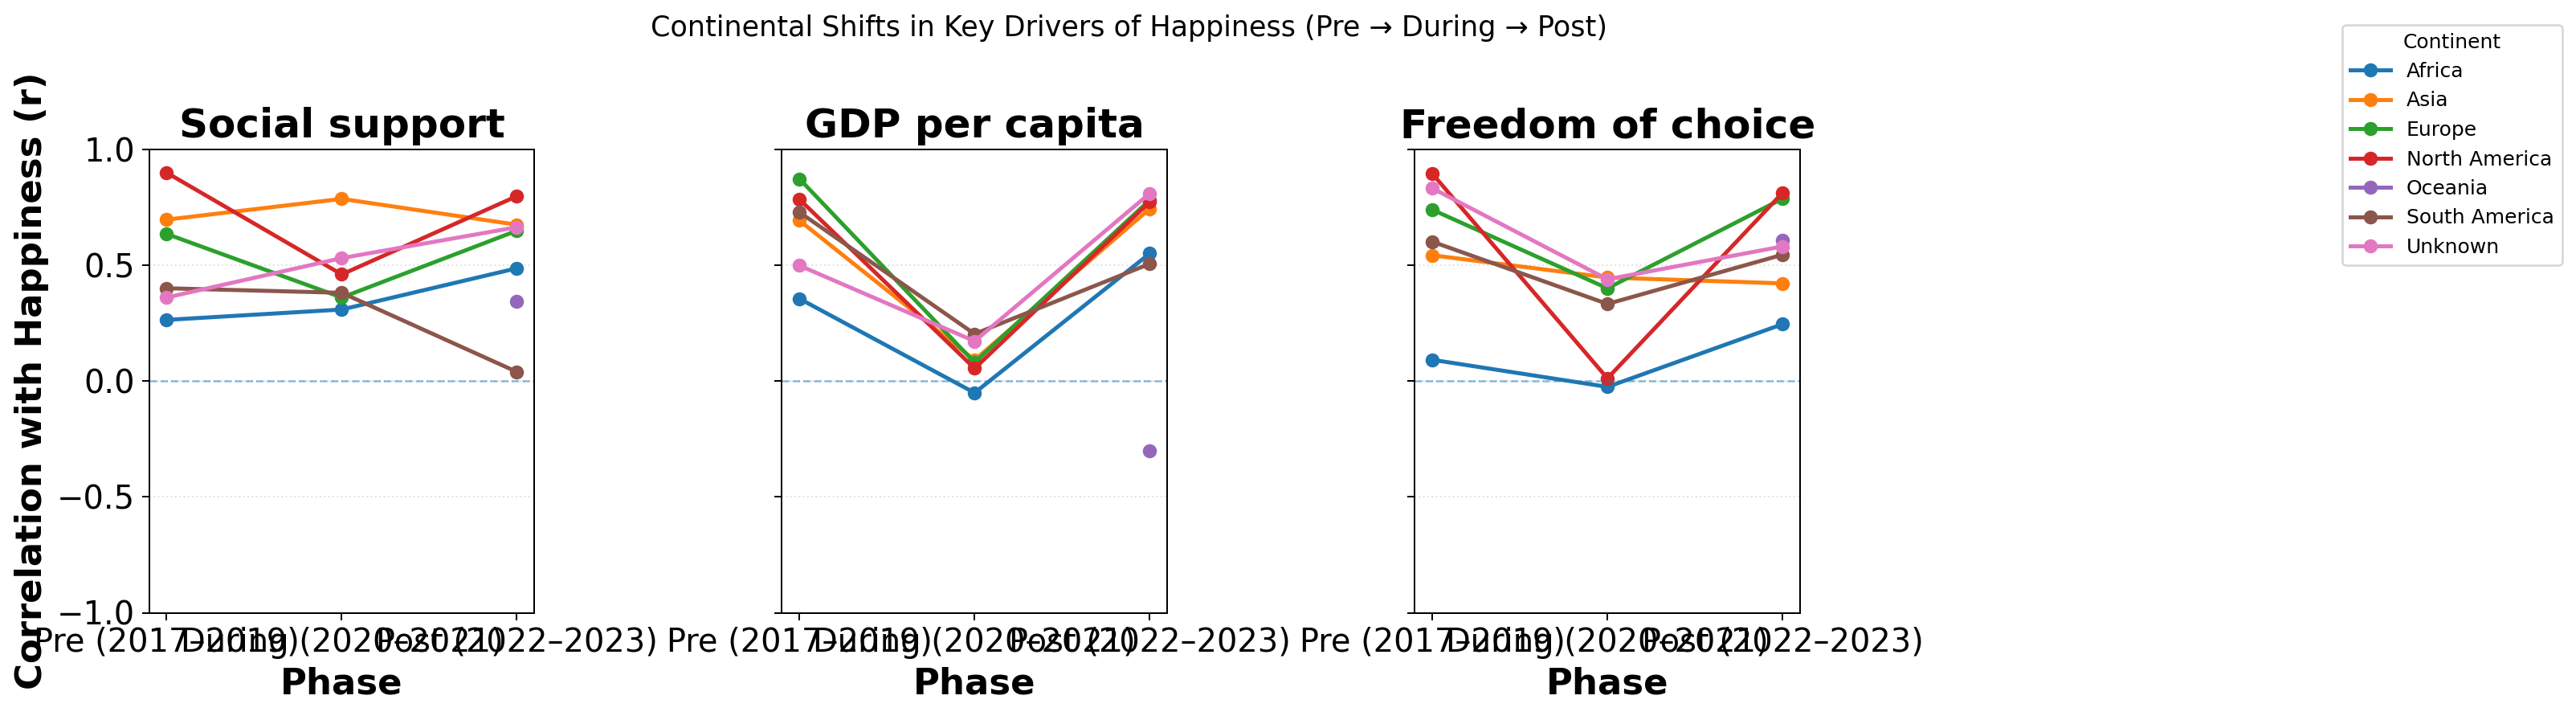

In [444]:
import matplotlib.pyplot as plt

# ==== CONFIG (matches your columns exactly) ====
DF = df_focus.copy()                 # <-- use your dataframe
OUTCOME = "Happiness_Score"
REGION_COL = "Continent"
FACTORS = ["Social_support", "GDP_per_capita", "Freedom_of_choice"]  # your 3 drivers
PHASE_ORDER = ["Pre (2017–2019)", "During (2020–2021)", "Post (2022–2023)"]
MIN_N = 5   # keep small so all continents appear; raise if too noisy

# ---- quick guard: check columns exist ----
required = [OUTCOME, "year", REGION_COL] + FACTORS
missing = [c for c in required if c not in DF.columns]
if missing:
    raise KeyError(f"Missing columns: {missing}\nAvailable: {list(DF.columns)}")

# Ensure numeric types
DF[[OUTCOME, "year"] + FACTORS] = DF[[OUTCOME, "year"] + FACTORS].apply(pd.to_numeric, errors="coerce")

# Map year -> phase
def to_phase(y):
    y = int(y)
    if y in (2017, 2018, 2019): return "Pre (2017–2019)"
    if y in (2020, 2021):       return "During (2020–2021)"
    if y in (2022, 2023):       return "Post (2022–2023)"
    return None

DF["Phase"] = DF["year"].apply(to_phase)
DF = DF[DF["Phase"].notna()]
DF["Phase"] = pd.Categorical(DF["Phase"], categories=PHASE_ORDER, ordered=True)

# ---- correlations by Continent x Phase for the chosen 3 factors ----
rows = []
for (cont, ph), g in DF.groupby([REGION_COL, "Phase"]):
    if len(g) < MIN_N:  # skip tiny groups to avoid junk r
        continue
    r = g[FACTORS + [OUTCOME]].corr()[OUTCOME].drop(OUTCOME)
    for drv, val in r.items():
        rows.append((cont, drv, ph, val, len(g)))

cr = pd.DataFrame(rows, columns=["Continent", "Driver", "Phase", "r", "N"]).dropna()
if cr.empty:
    raise ValueError("No continent–phase groups met MIN_N. Lower MIN_N or check data coverage.")

# Optional: sanity tables
for d in FACTORS:
    print(f"\n{d} – correlation by continent & phase")
    print(cr[cr["Driver"]==d].pivot(index="Continent", columns="Phase", values="r").round(2))

# ---- plot: 3 panels (one per driver), continents as lines ----
continents = sorted(cr["Continent"].unique())
color_map = dict(zip(continents, plt.cm.tab10.colors[:len(continents)]))

fig, axes = plt.subplots(1, 3, figsize=(16,5), sharey=True)
for ax, drv in zip(axes, FACTORS):
    sub = cr[cr["Driver"] == drv]
    for cont in continents:
        s = sub[sub["Continent"] == cont].sort_values("Phase")
        if s.empty: 
            continue
        ax.plot(s["Phase"], s["r"], marker="o", linewidth=2, label=cont, color=color_map[cont])
    ax.axhline(0, ls="--", lw=1, alpha=0.5)
    # show n per phase under ticks
    ns = (DF.groupby([REGION_COL, "Phase"]).size().unstack().reindex(continents).sum(axis=0))
    ax.set_xticklabels([f"{ph}" for ph in PHASE_ORDER])
    ax.set_title(drv.replace("_", " "))
    ax.set_xlabel("Phase")
    ax.set_ylim(-1, 1)
    ax.grid(axis="y", linestyle=":", alpha=0.35)

axes[0].set_ylabel("Correlation with Happiness (r)")
# one legend for all
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Continent", bbox_to_anchor=(1.02, 0.98), loc="upper left")
fig.suptitle("Continental Shifts in Key Drivers of Happiness (Pre → During → Post)", fontsize=14)
fig.tight_layout(rect=[0,0,0.85,0.95])
plt.show()


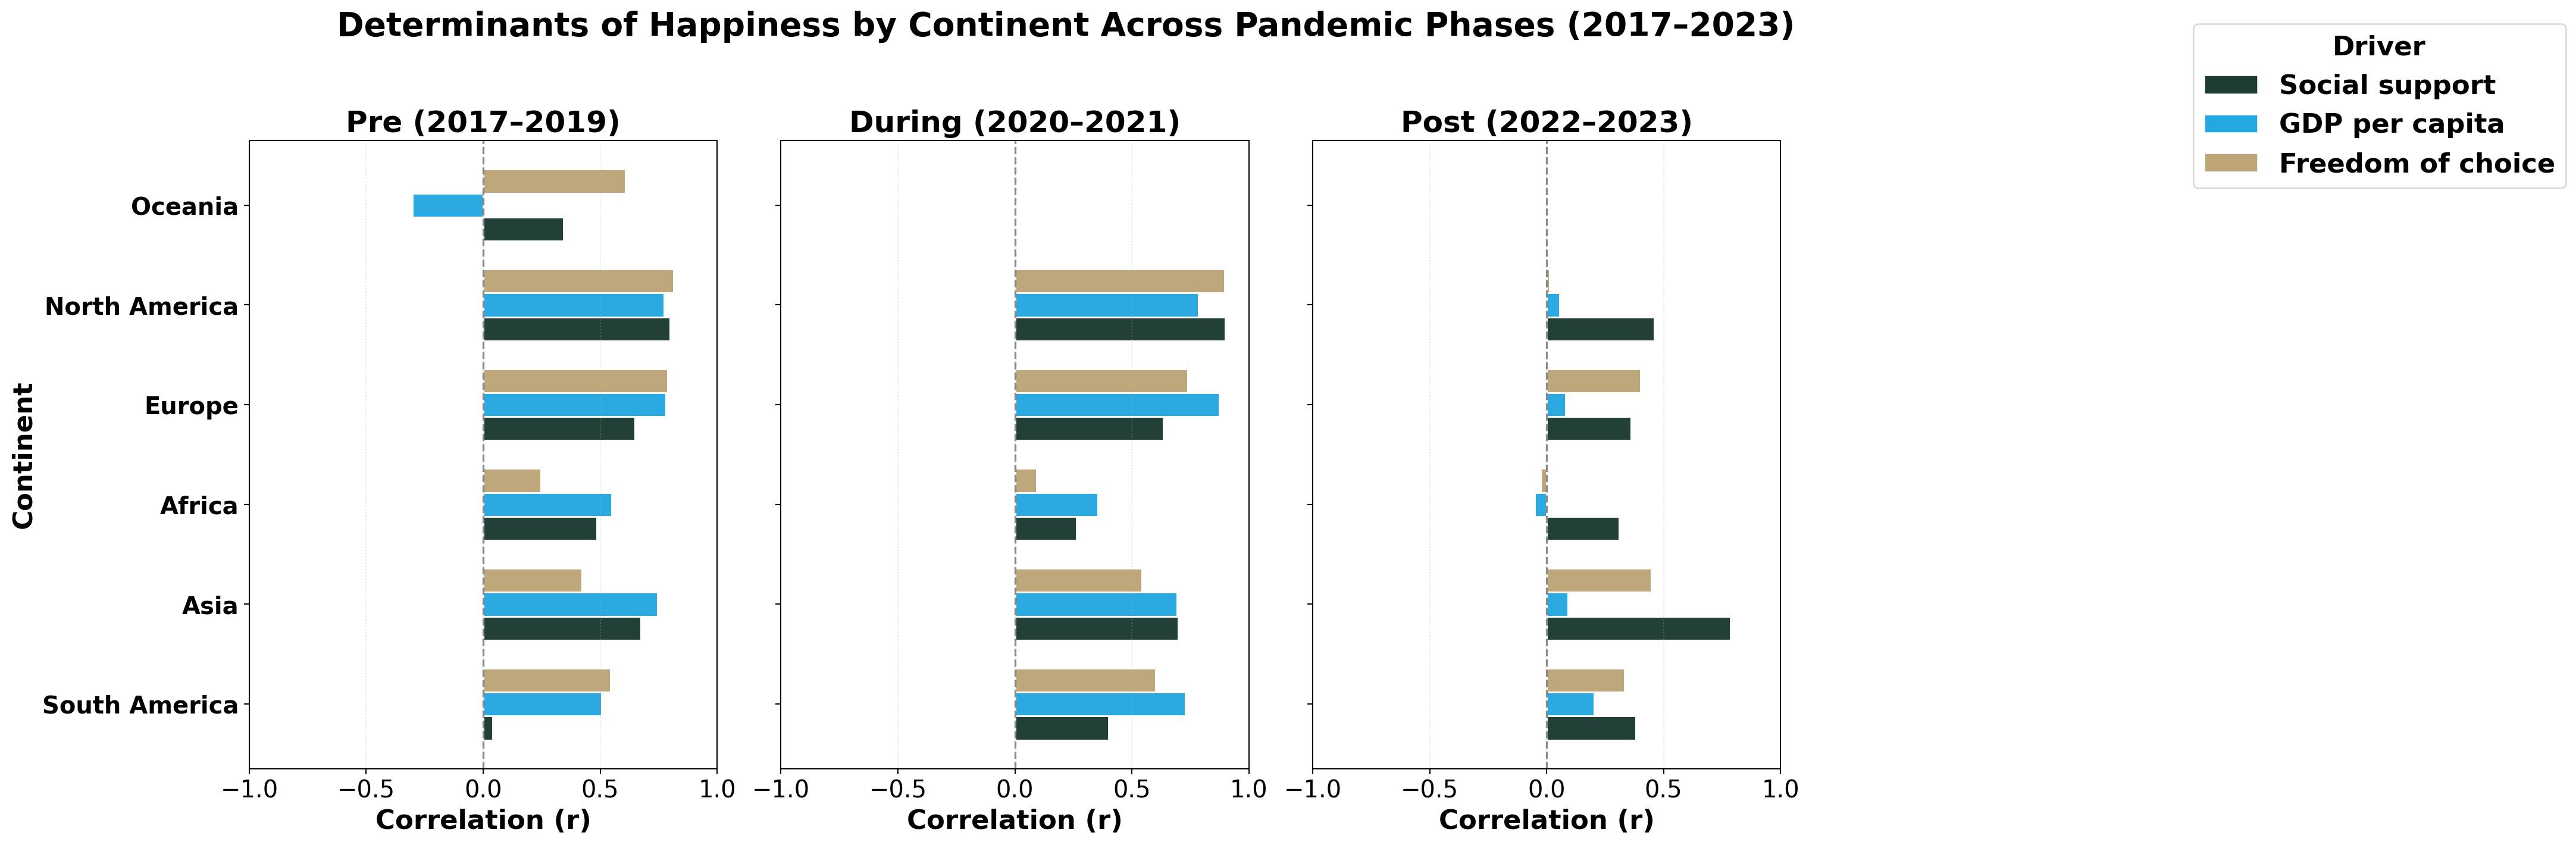

In [445]:
# ==== ONE-CELL PLOT (recompute + plot with big fonts) ====
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# ---- SETTINGS ----
DF = df_focus.copy()  # your DataFrame
OUTCOME = "Happiness_Score"
REGION  = "Continent"
FACTORS = ["Social_support", "GDP_per_capita", "Freedom_of_choice"]
PHASES  = ["Pre (2017–2019)", "During (2020–2021)", "Post (2022–2023)"]
MIN_N   = 5

# custom colors (dark green, blue, sand)
COLORS = {
    "Social_support":    "#1D3C34",
    "GDP_per_capita":    "#25A8E0",
    "Freedom_of_choice": "#BDA577",
}

# ---- PREPARE DATA ----
# numeric + phase
DF[[OUTCOME, "year"] + FACTORS] = DF[[OUTCOME, "year"] + FACTORS].apply(pd.to_numeric, errors="coerce")

def to_phase(y):
    y = int(y)
    if y in (2017, 2018, 2019): return PHASES[0]
    if y in (2020, 2021):       return PHASES[1]
    if y in (2022, 2023):       return PHASES[2]
    return None

DF["Phase"] = DF["year"].apply(to_phase)
DF = DF[DF["Phase"].notna()]
DF["Phase"] = pd.Categorical(DF["Phase"], categories=PHASES, ordered=True)

# drop Unknown continents if present
DF = DF[DF[REGION].notna()]
DF = DF[DF[REGION].str.lower() != "unknown"]

# correlations by Continent × Phase (three drivers)
rows = []
for (cont, ph), g in DF.groupby([REGION, "Phase"]):
    if len(g) < MIN_N:
        continue
    r = g[FACTORS + [OUTCOME]].corr()[OUTCOME].drop(OUTCOME)
    for drv, val in r.items():
        rows.append((cont, drv, ph, float(val)))
cr = pd.DataFrame(rows, columns=["Continent","Driver","Phase","r"]).dropna()

# sanity check
if cr.empty:
    raise ValueError("No continent–phase groups met MIN_N or data missing. "
                     "Lower MIN_N or check columns and year coverage.")

# continent order by Δ Social_support (Post − Pre)
ss = cr[cr["Driver"]=="Social_support"].pivot(index="Continent", columns="Phase", values="r")
ss["delta_post_pre"] = ss[PHASES[2]] - ss[PHASES[0]]
continents_sorted = list(ss["delta_post_pre"].sort_values(ascending=False).index)

# ---- BIG FONTS / STYLING ----
TITLE_SZ  = 22
SUB_SZ    = 20
LABEL_SZ  = 18
TICK_SZ   = 16
LEGEND_SZ = 18

plt.rcParams.update({
    "figure.dpi": 180,
    "axes.titlesize": SUB_SZ,
    "axes.titleweight": "bold",
    "axes.labelsize": LABEL_SZ,
    "axes.labelweight": "bold",
    "xtick.labelsize": TICK_SZ,
    "ytick.labelsize": TICK_SZ,
})

# ---- PLOT ----
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharex=True, sharey=True)
bar_h = 0.24
offsets = (-bar_h, 0.0, bar_h)

for ax, ph in zip(axes, PHASES):
    sub = cr[cr["Phase"] == ph]
    y = np.arange(len(continents_sorted))

    for off, drv in zip(offsets, FACTORS):
        s = (sub[sub["Driver"] == drv]
                .set_index("Continent")["r"]
                .reindex(continents_sorted))
        ax.barh(y + off, s.values, height=bar_h,
                color=COLORS[drv], edgecolor="white", linewidth=1.2, alpha=0.98)

    ax.set_yticks(y)
    ax.set_yticklabels(continents_sorted, fontweight="bold")
    ax.axvline(0, ls="--", lw=1.3, color="#6e6e6e", alpha=0.8)
    ax.set_title(ph)
    ax.set_xlim(-1.0, 1.0)
    ax.grid(axis="x", linestyle=":", alpha=0.35)
    ax.set_xlabel("Correlation (r)", fontsize=LABEL_SZ, fontweight="bold")

axes[0].set_ylabel("Continent", fontsize=LABEL_SZ, fontweight="bold")

legend_patches = [Patch(facecolor=COLORS[d], edgecolor="white", label=d.replace("_"," "))
                  for d in FACTORS]
leg = fig.legend(handles=legend_patches, title="Driver", bbox_to_anchor=(1.02, 0.98),
                 loc="upper left", frameon=True, ncol=1, fontsize=LEGEND_SZ)
leg.get_title().set_fontsize(LEGEND_SZ)
leg.get_title().set_weight("bold")
for txt in leg.get_texts():
    txt.set_fontweight("bold")

fig.suptitle("Determinants of Happiness by Continent Across Pandemic Phases (2017–2023)",
             fontsize=TITLE_SZ, fontweight="bold")
fig.tight_layout(rect=[0, 0, 0.85, 0.94])
plt.show()
